# objectives 
1.to analyze the dataset, 
2.identify factors driving customer turnover, 
3 .develop an accurate Machine Learning model to predict potential departures,
4.recommend customized retention strategies.

# Importing necessary libraries and overview of the dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data 
from sklearn.preprocessing import StandardScaler

# Loading data

In [2]:
df=pd.read_csv("verizonet_data (1).csv")

df

Customer ID Referred a Friend  Number of Referrals  Tenure in Months  \
0     8779-QRDMV                No                    0                 1   
1     7495-OOKFY               Yes                    1                 8   
2     1658-BYGOY                No                    0                18   
3     4598-XLKNJ               Yes                    1                25   
4     4846-WHAFZ               Yes                    1                37   
...          ...               ...                  ...               ...   
7038  2569-WGERO                No                    0                72   
7039  6840-RESVB               Yes                    1                24   
7040  2234-XADUH               Yes                    4                72   
7041  4801-JZAZL               Yes                    1                11   
7042  3186-AJIEK                No                    0                66   

        Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0         NaN            No                               0.00             No   
1     Offer E           Yes                              48.85            Yes   
2     Offer D           Yes                              11.33            Yes   
3     Offer C           Yes                              19.76             No   
4     Offer C           Yes                               6.33            Yes   
...       ...           ...                                ...            ...   
7038      NaN           Yes                              22.77             No   
7039  Offer C           Yes                              36.05            Yes   
7040      NaN           Yes                              29.66            Yes   
7041      NaN            No                               0.00             No   
7042      NaN           Yes                              30.96             No   

     Internet Service Internet Type  ...          City Zip Code Population  \
0                 Yes   Fiber Optic  ...   Los Angeles    90022      68701   
1                 Yes         Cable  ...   Los Angeles    90063      55668   
2                 Yes   Fiber Optic  ...   Los Angeles    90065      47534   
3                 Yes   Fiber Optic  ...     Inglewood    90303      27778   
4                 Yes         Cable  ...      Whittier    90602      26265   
...               ...           ...  ...           ...      ...        ...   
7038               No           NaN  ...       Landers    92285       2182   
7039              Yes           DSL  ...      Adelanto    92301      18980   
7040              Yes         Cable  ...         Amboy    92304         42   
7041              Yes           DSL  ...  Angelus Oaks    92305        301   
7042              Yes   Fiber Optic  ...  Apple Valley    92308      28819   

     Churn Status  CLTV   Churn Category                  Churn Reason  \
0               1  5433       Competitor  Competitor offered more data   
1               1  5302       Competitor  Competitor made better offer   
2               1  3179       Competitor  Competitor made better offer   
3               1  5337  Dissatisfaction     Limited range of services   
4               1  2793            Price            Extra data charges   
...           ...   ...              ...                           ...   
7038            0  5306              NaN                           NaN   
7039            0  2140              NaN                           NaN   
7040            0  5560              NaN                           NaN   
7041            0  2793              NaN                           NaN   
7042            0  5097              NaN                           NaN   

     Total Customer Svc Requests Product/Service Issues Reported  \
0                              5                               0   
1                              5                               0   
2                              1                               0   
3        

In [3]:
df.head()

Customer ID Referred a Friend  Number of Referrals  Tenure in Months  \
0  8779-QRDMV                No                    0                 1   
1  7495-OOKFY               Yes                    1                 8   
2  1658-BYGOY                No                    0                18   
3  4598-XLKNJ               Yes                    1                25   
4  4846-WHAFZ               Yes                    1                37   

     Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0      NaN            No                               0.00             No   
1  Offer E           Yes                              48.85            Yes   
2  Offer D           Yes                              11.33            Yes   
3  Offer C           Yes                              19.76             No   
4  Offer C           Yes                               6.33            Yes   

  Internet Service Internet Type  ...         City Zip Code Population  \
0              Yes   Fiber Optic  ...  Los Angeles    90022      68701   
1              Yes         Cable  ...  Los Angeles    90063      55668   
2              Yes   Fiber Optic  ...  Los Angeles    90065      47534   
3              Yes   Fiber Optic  ...    Inglewood    90303      27778   
4              Yes         Cable  ...     Whittier    90602      26265   

  Churn Status  CLTV   Churn Category                  Churn Reason  \
0            1  5433       Competitor  Competitor offered more data   
1            1  5302       Competitor  Competitor made better offer   
2            1  3179       Competitor  Competitor made better offer   
3            1  5337  Dissatisfaction     Limited range of services   
4            1  2793            Price            Extra data charges   

  Total Customer Svc Requests Product/Service Issues Reported  \
0                           5                               0   
1                           5                               0   
2                           1                               0   
3                           1                               1   
4                           1                               0   

  Customer Satisfaction rate  
0                        NaN  
1                        NaN  
2                        NaN  
3                        2.0  
4                        2.0  

[5 rows x 43 columns]

In [4]:
# Check the info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

# Data Preprocessing and Exploratory Data Analysis


In [5]:
#Check for NaN values in the DataFrame
nan_values = df.isna().sum()

# Display the NaN values for each column
print(nan_values)


Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

In [6]:
# Find duplicated values in data



duplicated_rows = df[df.duplicated()]

# Display the duplicated rows
print("Duplicated Rows:")
print(duplicated_rows)


Duplicated Rows:
Empty DataFrame
Columns: [Customer ID, Referred a Friend, Number of Referrals, Tenure in Months, Offer, Phone Service, Avg Monthly Long Distance Charges, Multiple Lines, Internet Service, Internet Type, Avg Monthly GB Download, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data, Contract, Paperless Billing, Payment Method, Monthly Charge, Total Regular Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Gender, Age, Under 30, Senior Citizen, Married, Dependents, City, Zip Code, Population, Churn Status, CLTV, Churn Category, Churn Reason, Total Customer Svc Requests, Product/Service Issues Reported, Customer Satisfaction rate]
Index: []

[0 rows x 43 columns]


In [7]:
#there is no duplicated rows

In [8]:
unique_values = {}  # Create a dictionary to store unique values and their lengths

for column in df.columns:
    unique = df[column].unique()  # Get unique values for the column
    length = len(unique)  # Get the length of unique values
    unique_values[column] = {"unique_values": unique, "length": length}

# Print the unique values and their lengths for each feature
for column, values in unique_values.items():
    print(f"Feature: {column}")
    print(f"Unique Values: {values['unique_values']}")
    print(f"Number of Unique Values: {values['length']}")
    print()


Feature: Customer ID
Unique Values: ['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Number of Unique Values: 7043

Feature: Referred a Friend
Unique Values: ['No' 'Yes']
Number of Unique Values: 2

Feature: Number of Referrals
Unique Values: [ 0  1  6  2  4  3  7  5  8  9 10 11]
Number of Unique Values: 12

Feature: Tenure in Months
Unique Values: [ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63]
Number of Unique Values: 72

Feature: Offer
Unique Values: [nan 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
Number of Unique Values: 6

Feature: Phone Service
Unique Values: ['No' 'Yes']
Number of Unique Values: 2

Feature: Avg Monthly Long Distance Charges
Unique Values: [ 0.   48.85 11.33 ... 44.99 44.98  8.62]
Number of Unique Values: 3584

Feature: Multiple Lines
Unique Values: [

In [9]:
#Imputing the missing values with median value

df['Customer Satisfaction rate'] = df['Customer Satisfaction rate'].fillna(3)


df['Offer'] = df['Offer'].fillna('NO')

df['Internet Type'] = df['Internet Type'].fillna('Fiber Optic')
df['Churn Category'] = df['Churn Category'].fillna('Competitor')

df


Customer ID Referred a Friend  Number of Referrals  Tenure in Months  \
0     8779-QRDMV                No                    0                 1   
1     7495-OOKFY               Yes                    1                 8   
2     1658-BYGOY                No                    0                18   
3     4598-XLKNJ               Yes                    1                25   
4     4846-WHAFZ               Yes                    1                37   
...          ...               ...                  ...               ...   
7038  2569-WGERO                No                    0                72   
7039  6840-RESVB               Yes                    1                24   
7040  2234-XADUH               Yes                    4                72   
7041  4801-JZAZL               Yes                    1                11   
7042  3186-AJIEK                No                    0                66   

        Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0          NO            No                               0.00             No   
1     Offer E           Yes                              48.85            Yes   
2     Offer D           Yes                              11.33            Yes   
3     Offer C           Yes                              19.76             No   
4     Offer C           Yes                               6.33            Yes   
...       ...           ...                                ...            ...   
7038       NO           Yes                              22.77             No   
7039  Offer C           Yes                              36.05            Yes   
7040       NO           Yes                              29.66            Yes   
7041       NO            No                               0.00             No   
7042       NO           Yes                              30.96             No   

     Internet Service Internet Type  ...          City Zip Code Population  \
0                 Yes   Fiber Optic  ...   Los Angeles    90022      68701   
1                 Yes         Cable  ...   Los Angeles    90063      55668   
2                 Yes   Fiber Optic  ...   Los Angeles    90065      47534   
3                 Yes   Fiber Optic  ...     Inglewood    90303      27778   
4                 Yes         Cable  ...      Whittier    90602      26265   
...               ...           ...  ...           ...      ...        ...   
7038               No   Fiber Optic  ...       Landers    92285       2182   
7039              Yes           DSL  ...      Adelanto    92301      18980   
7040              Yes         Cable  ...         Amboy    92304         42   
7041              Yes           DSL  ...  Angelus Oaks    92305        301   
7042              Yes   Fiber Optic  ...  Apple Valley    92308      28819   

     Churn Status  CLTV   Churn Category                  Churn Reason  \
0               1  5433       Competitor  Competitor offered more data   
1               1  5302       Competitor  Competitor made better offer   
2               1  3179       Competitor  Competitor made better offer   
3               1  5337  Dissatisfaction     Limited range of services   
4               1  2793            Price            Extra data charges   
...           ...   ...              ...                           ...   
7038            0  5306       Competitor                           NaN   
7039            0  2140       Competitor                           NaN   
7040            0  5560       Competitor                           NaN   
7041            0  2793       Competitor                           NaN   
7042            0  5097       Competitor                           NaN   

     Total Customer Svc Requests Product/Service Issues Reported  \
0                              5                               0   
1                              5                               0   
2                              1                               0   
3        

# Check the summary statistics of the data 

In [10]:
df.describe().T

count          mean           std  \
Number of Referrals                7043.0      1.951867      3.001199   
Tenure in Months                   7043.0     32.386767     24.542061   
Avg Monthly Long Distance Charges  7043.0     22.958954     15.448113   
Avg Monthly GB Download            7043.0     21.110890     20.948471   
Monthly Charge                     7043.0     65.538800     30.606805   
Total Regular Charges              7043.0   2280.381264   2266.220462   
Total Refunds                      7043.0      1.962182      7.902614   
Total Extra Data Charges           7043.0    278.499225    685.039625   
Total Long Distance Charges        7043.0    749.099262    846.660055   
Age                                7043.0     46.509726     16.750352   
Zip Code                           7043.0  93486.070567   1856.767505   
Population                         7043.0  22139.603294  21152.392837   
Churn Status                       7043.0      0.265370      0.441561   
CLTV                               7043.0   4400.295755   1183.057152   
Total Customer Svc Requests        7043.0      1.338776      1.430471   
Product/Service Issues Reported    7043.0      0.308107      0.717514   
Customer Satisfaction rate         7043.0      3.001420      0.641284   

                                        min        25%        50%        75%  \
Number of Referrals                    0.00      0.000      0.000      3.000   
Tenure in Months                       1.00      9.000     29.000     55.000   
Avg Monthly Long Distance Charges      0.00      9.210     22.890     36.395   
Avg Monthly GB Download                0.00      3.000     17.000     28.000   
Monthly Charge                        18.25     35.890     71.968     90.650   
Total Regular Charges                 18.80    400.150   1394.550   3786.600   
Total Refunds                          0.00      0.000      0.000      0.000   
Total Extra Data Charges               0.00      0.000      0.000    182.620   
Total Long Distance Charges            0.00     70.545    401.440   1191.100   
Age                                   19.00     32.000     46.000     60.000   
Zip Code                           90001.00  92101.000  93518.000  95329.000   
Population                            11.00   2344.000  17554.000  36125.000   
Churn Status                           0.00      0.000      0.000      1.000   
CLTV                                2003.00   3469.000   4527.000   5380.500   
Total Customer Svc Requests            0.00      0.000      1.000      2.000   
Product/Service Issues Reported        0.00      0.000      0.000      0.000   
Customer Satisfaction rate             1.00      3.000      3.000      3.000   

                                          max  
Number of Referrals                    11.000  
Tenure in Months                       72.000  
Avg Monthly Long Distance Charges      49.990  
Avg Monthly GB Download                94.000  
Monthly Charge                        123.084  
Total Regular Charges                8684.800  
Total Refunds                          49.790  
Total Extra Data Charges             6477.000  
Total Long Distance Charges          3564.720  
Age                                    80.000  
Zip Code                            96150.000  
Population                         105285.000  
Churn Status                            1.000  
CLTV                                 6500.000  
Total Customer Svc Requests             9.000  
Product/Service Issues Reported         6.000  
Customer Satisfaction rate              5.000

In [11]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in df:
    df[i] = label_encoder.fit_transform(df[i])

Customer ID
Skew : 0.0


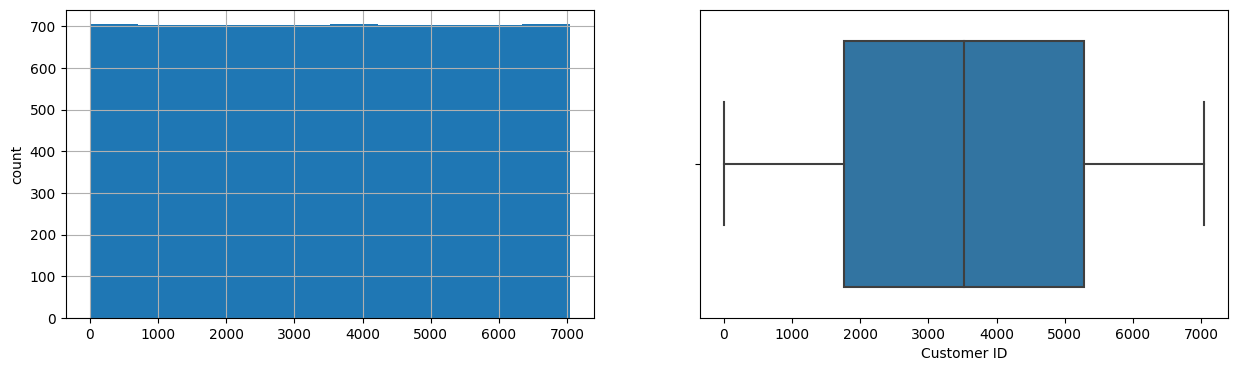

Referred a Friend
Skew : 0.17


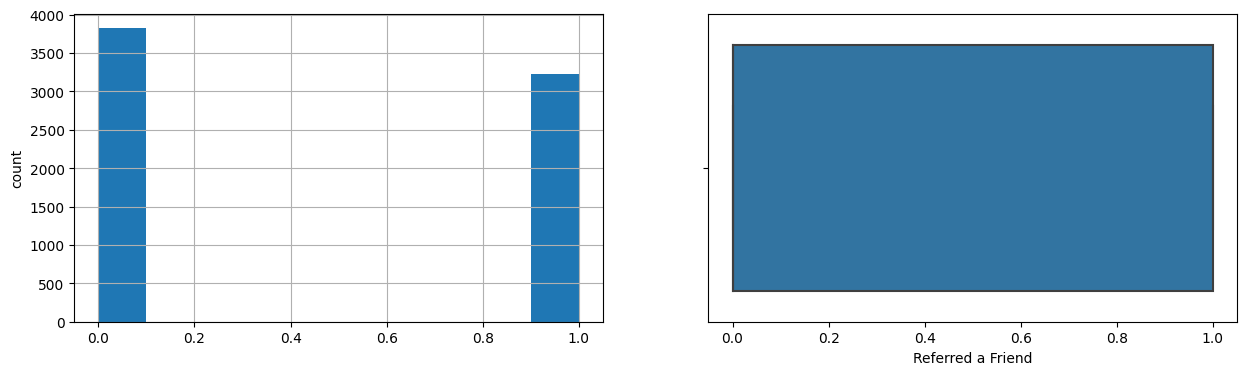

Number of Referrals
Skew : 1.45


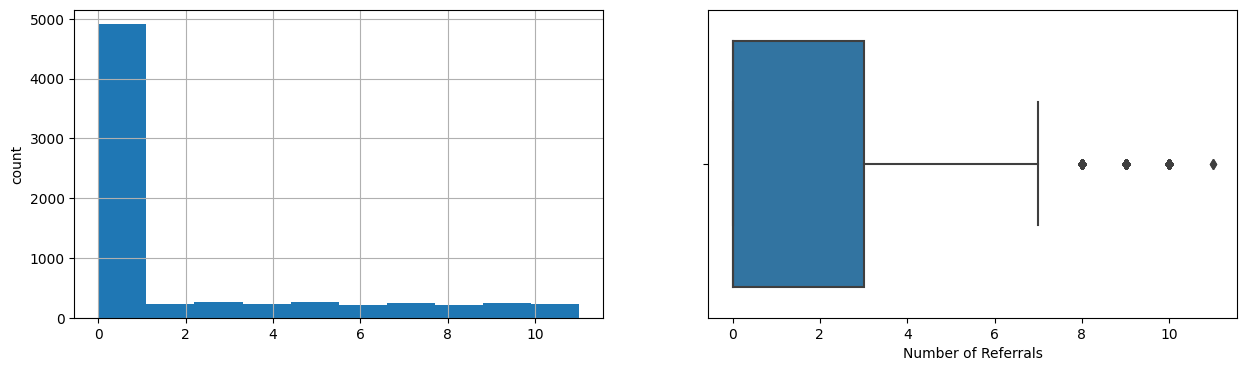

Tenure in Months
Skew : 0.24


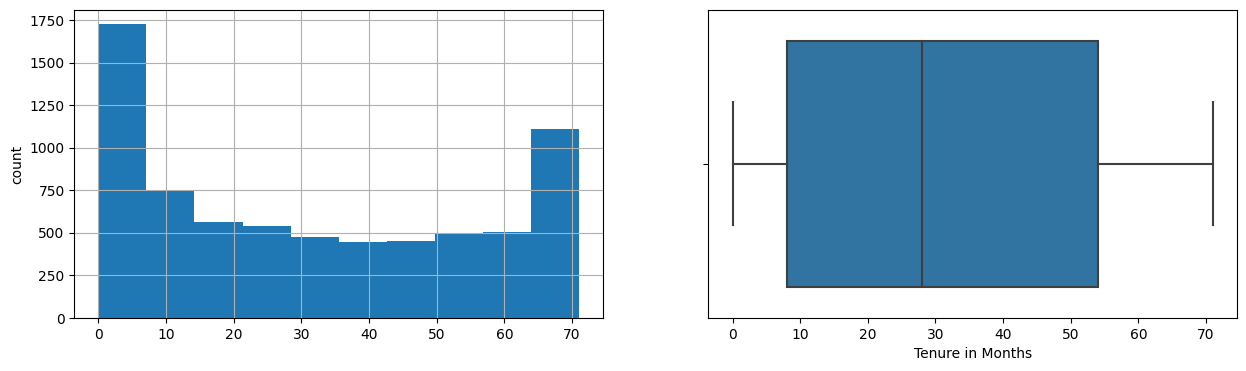

Offer
Skew : 0.92


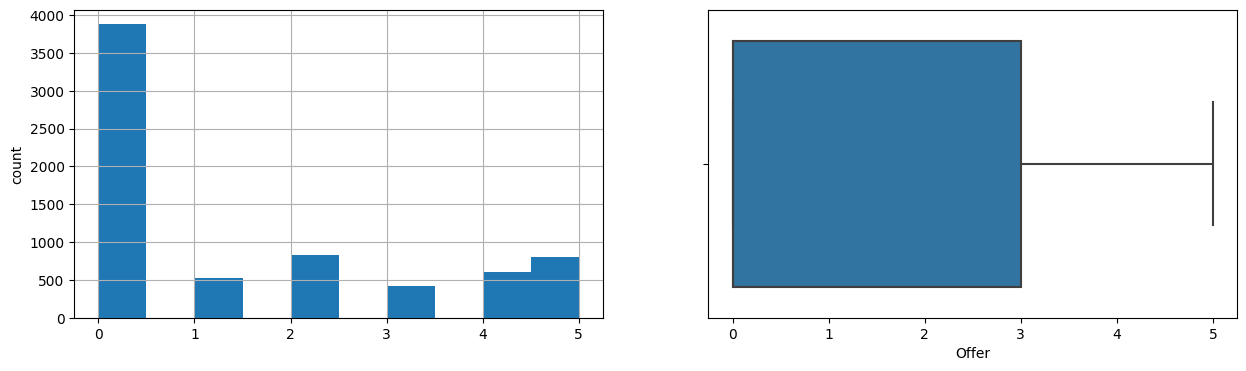

Phone Service
Skew : -2.73


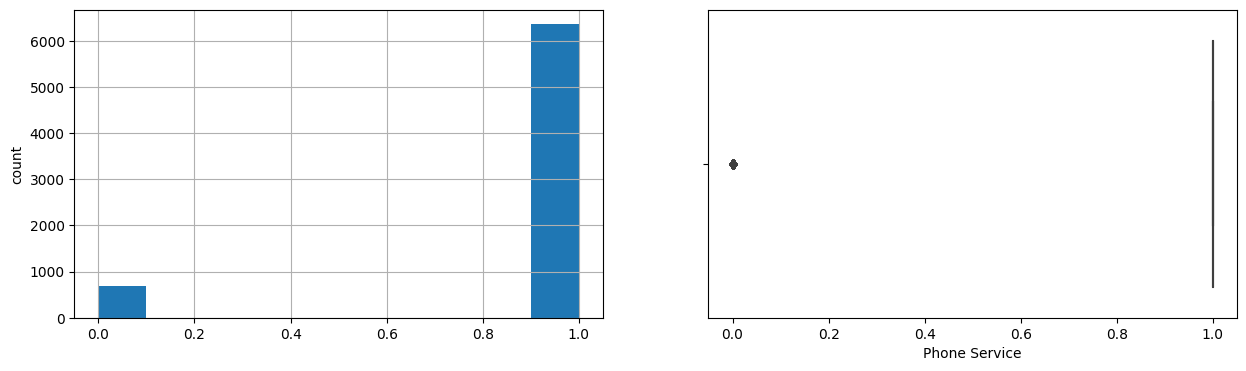

Avg Monthly Long Distance Charges
Skew : 0.08


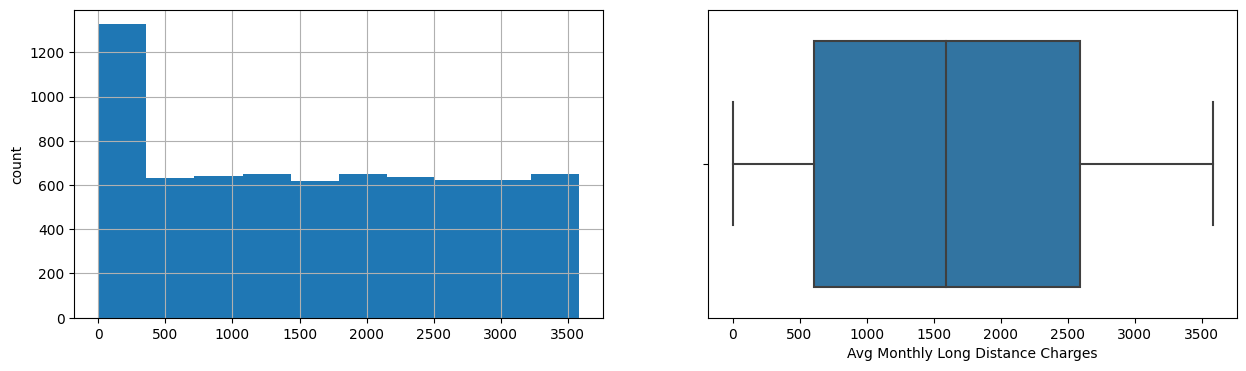

Multiple Lines
Skew : 0.32


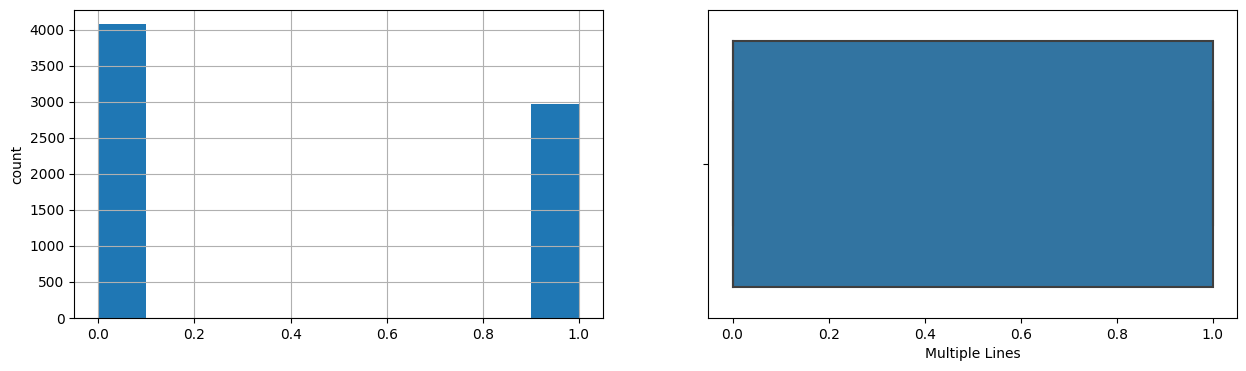

Internet Service
Skew : -1.38


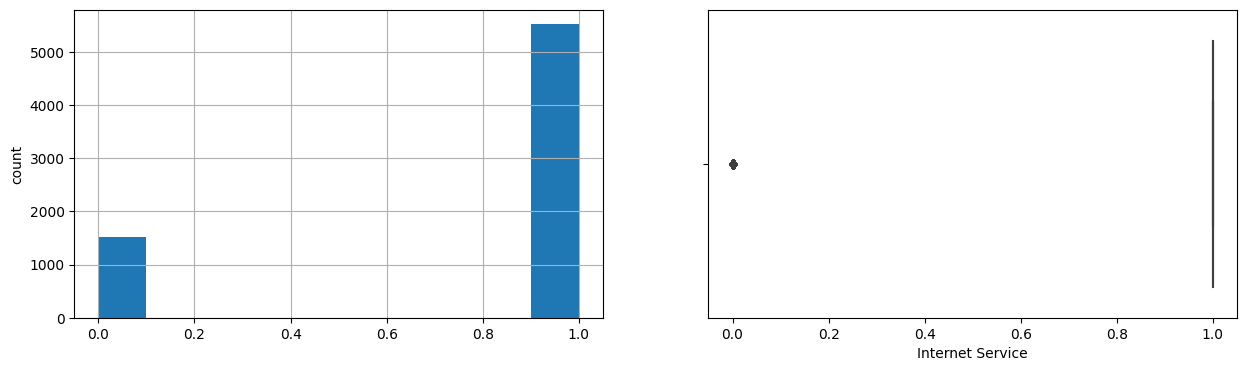

Internet Type
Skew : -0.65


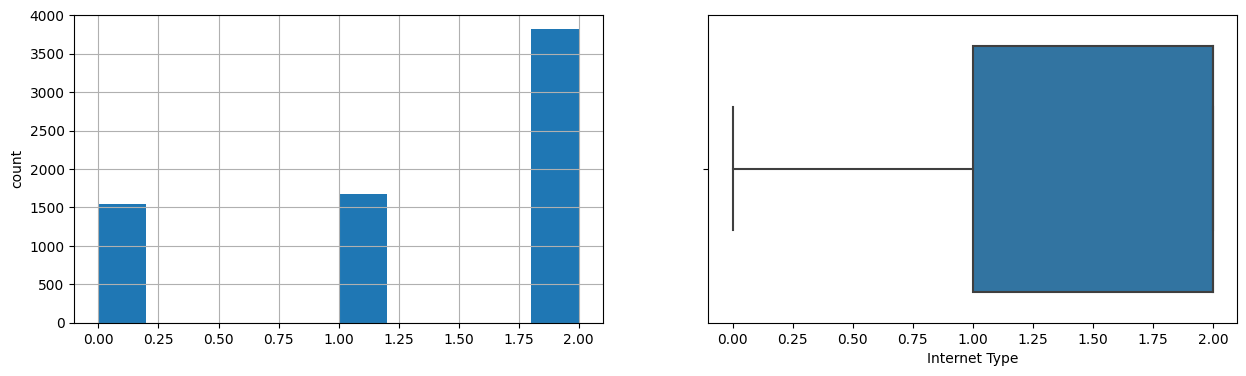

Avg Monthly GB Download
Skew : 0.72


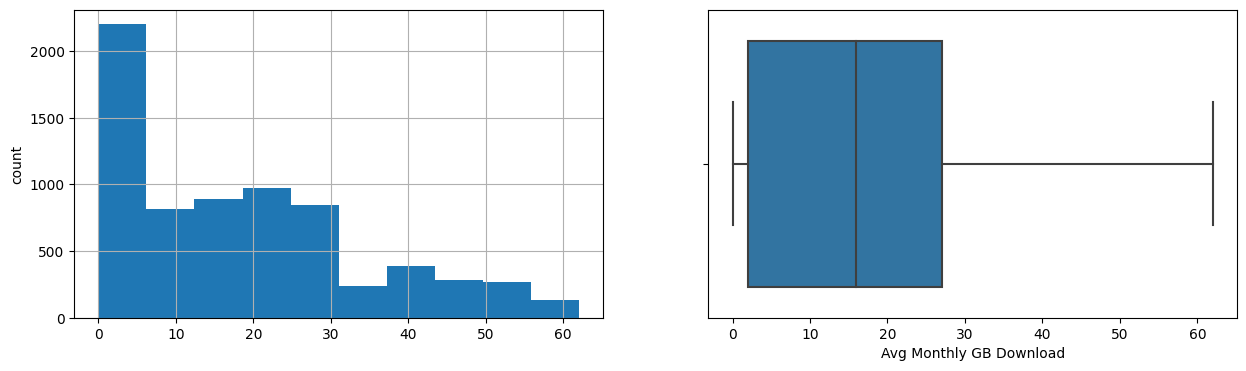

Online Security
Skew : 0.94


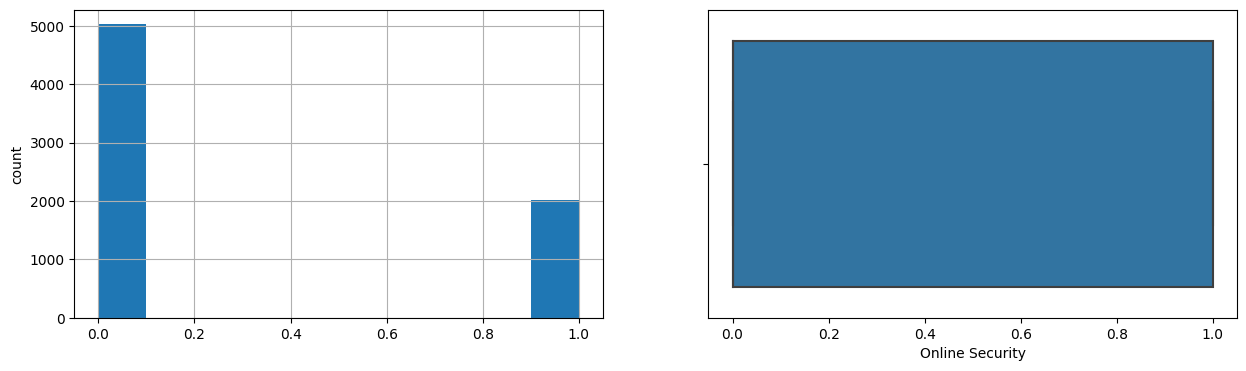

Online Backup
Skew : 0.65


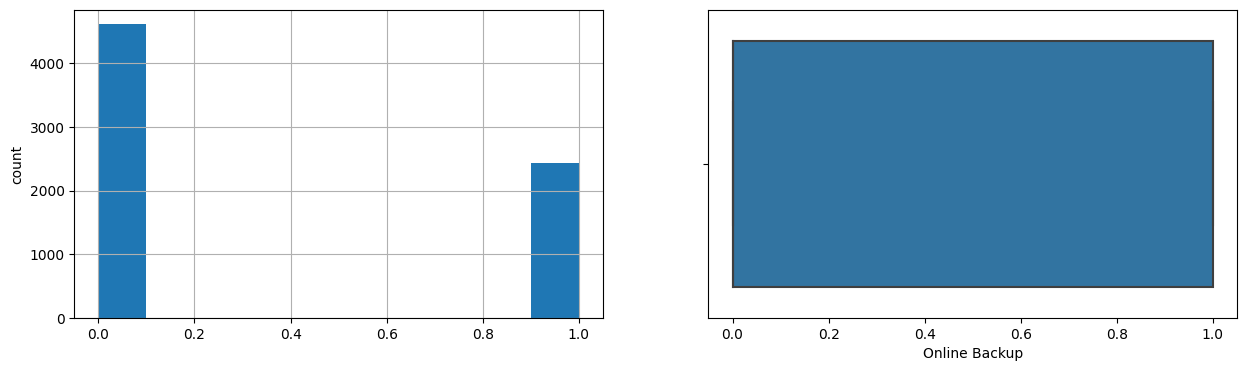

Device Protection Plan
Skew : 0.66


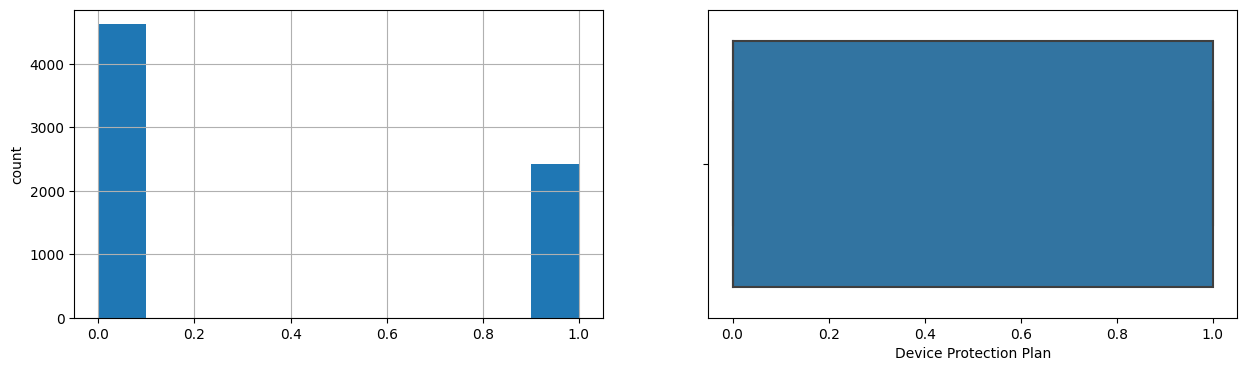

Premium Tech Support
Skew : 0.92


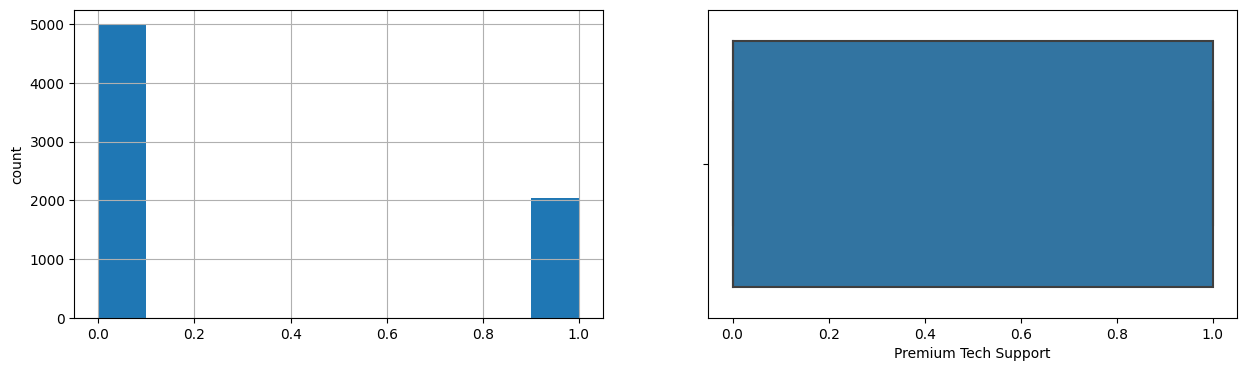

Streaming TV
Skew : 0.48


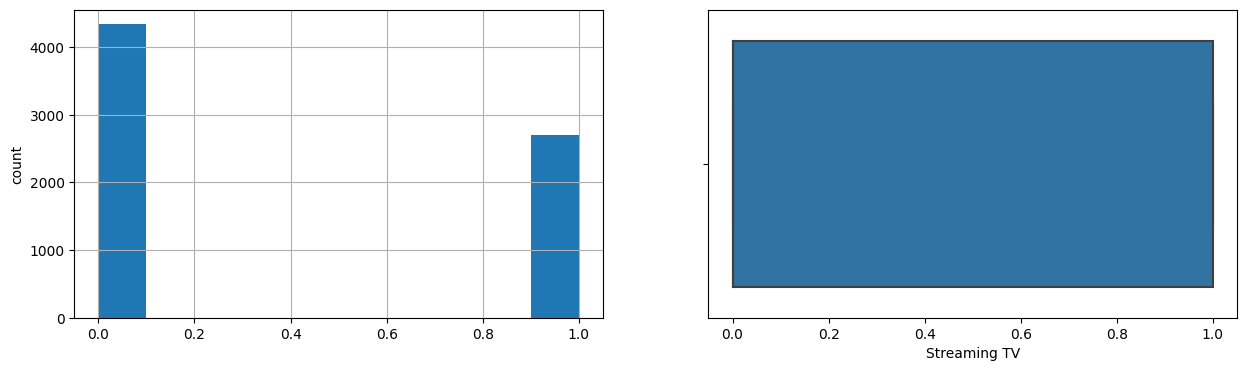

Streaming Movies
Skew : 0.46


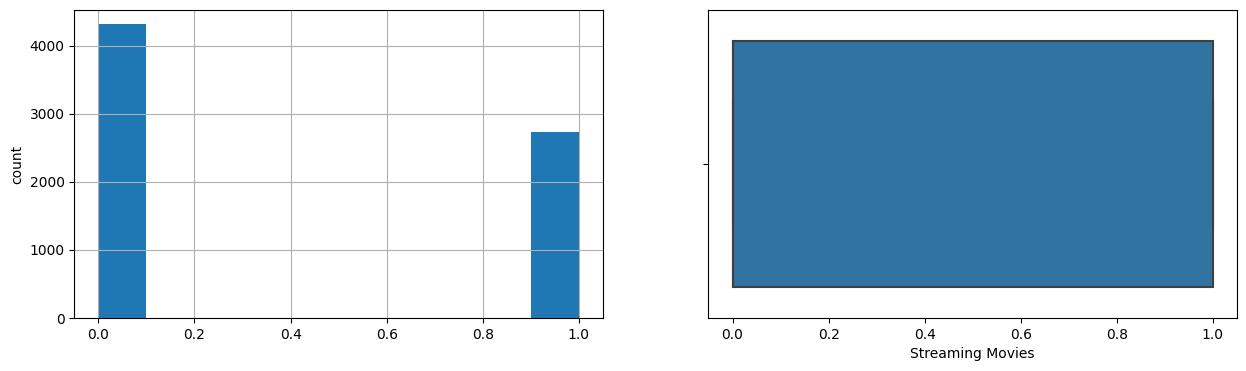

Streaming Music
Skew : 0.61


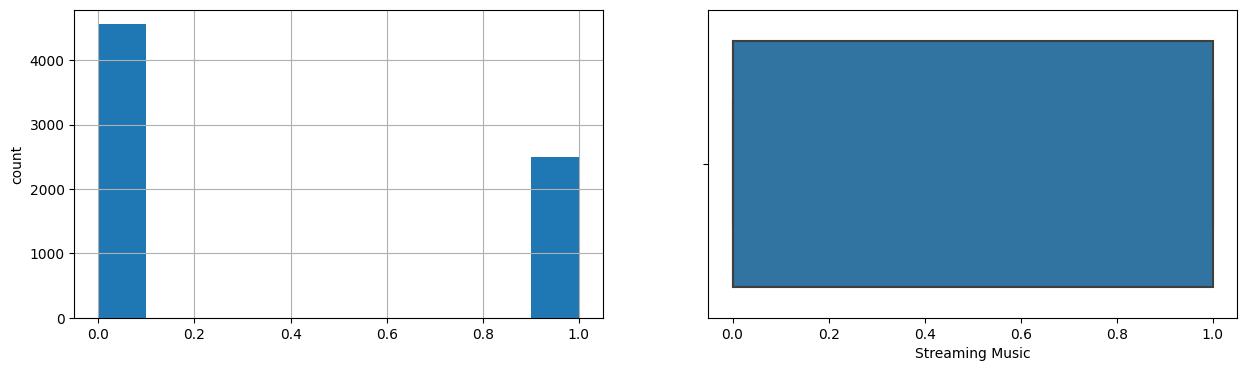

Unlimited Data
Skew : 0.48


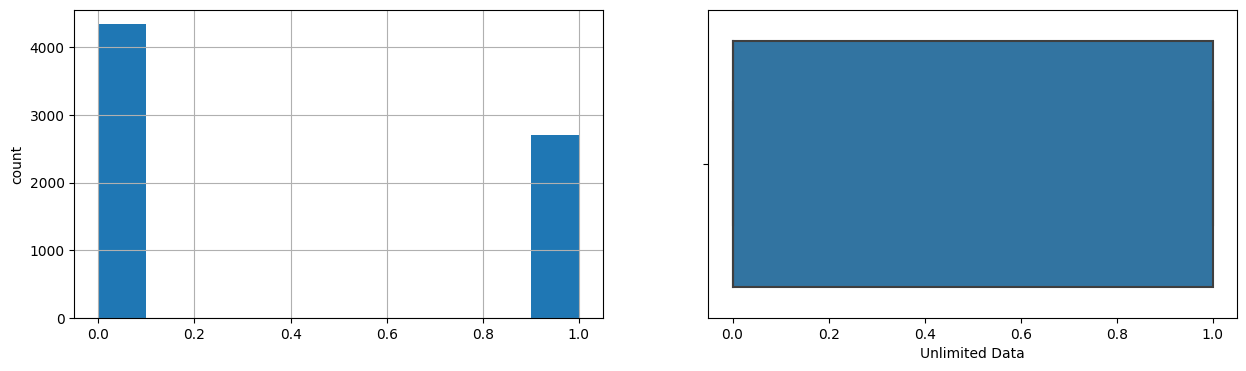

Contract
Skew : 0.49


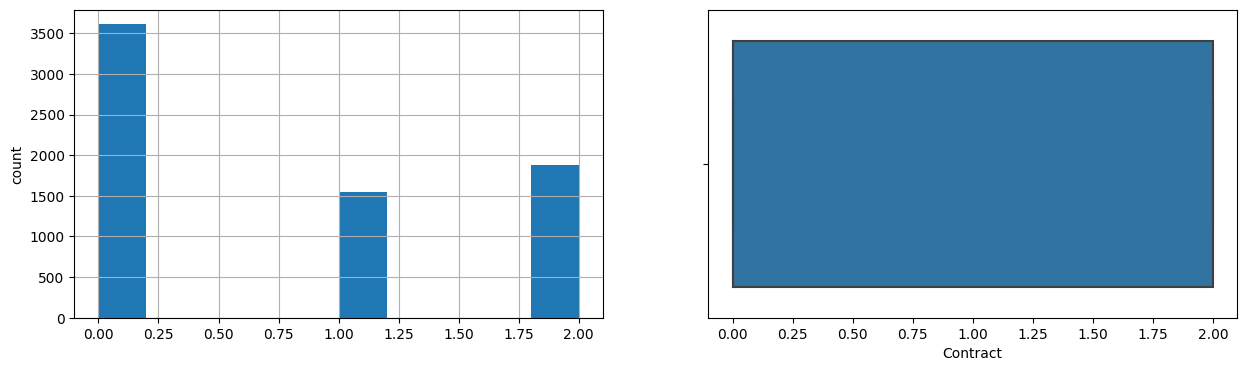

Paperless Billing
Skew : -0.38


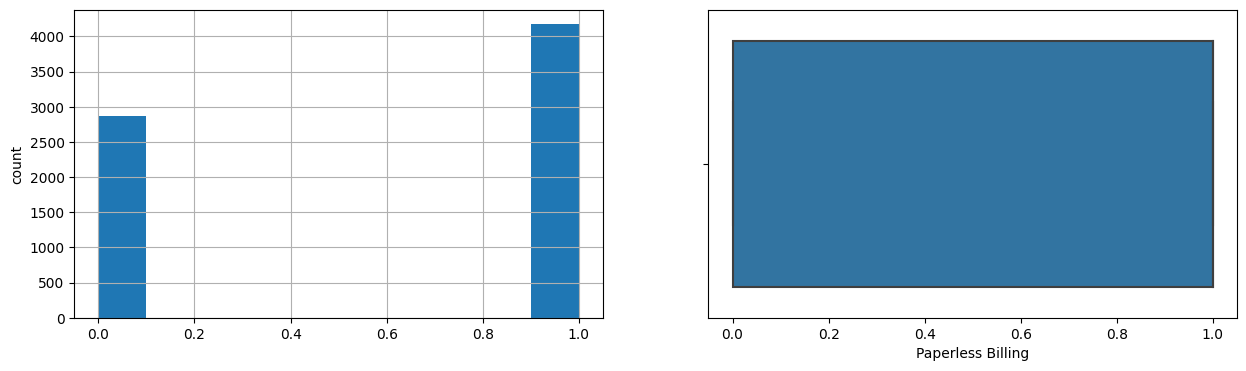

Payment Method
Skew : 0.76


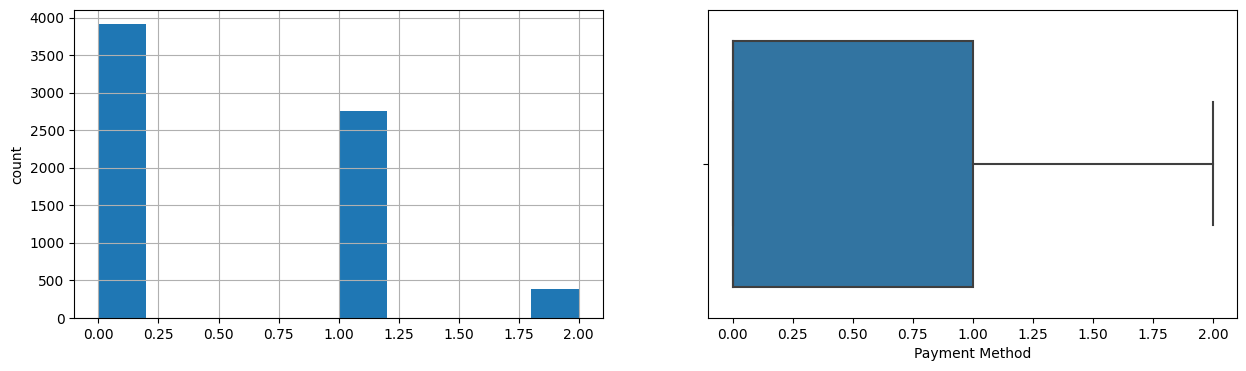

Monthly Charge
Skew : 0.13


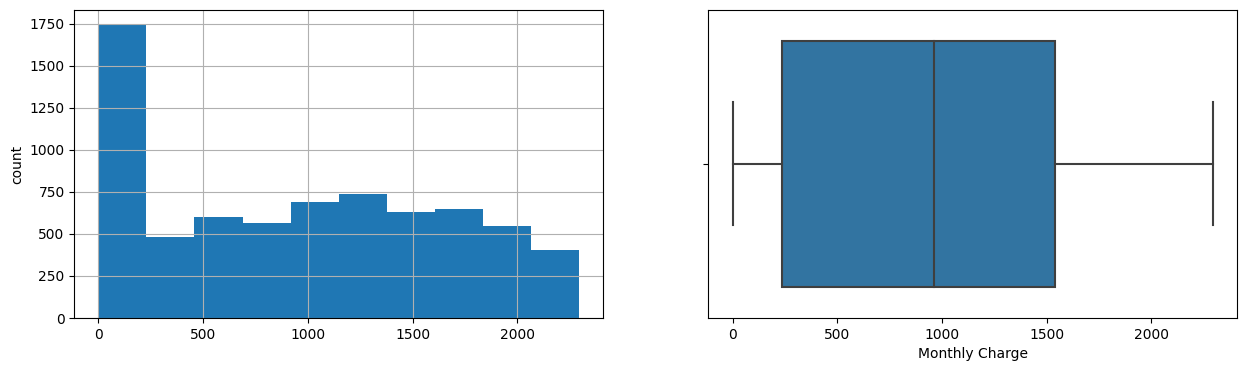

Total Regular Charges
Skew : 0.06


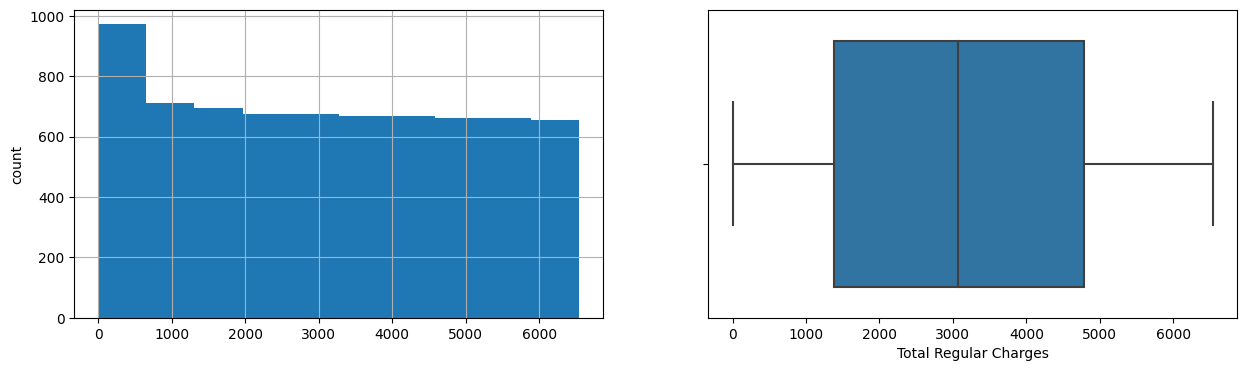

Total Refunds
Skew : 4.45


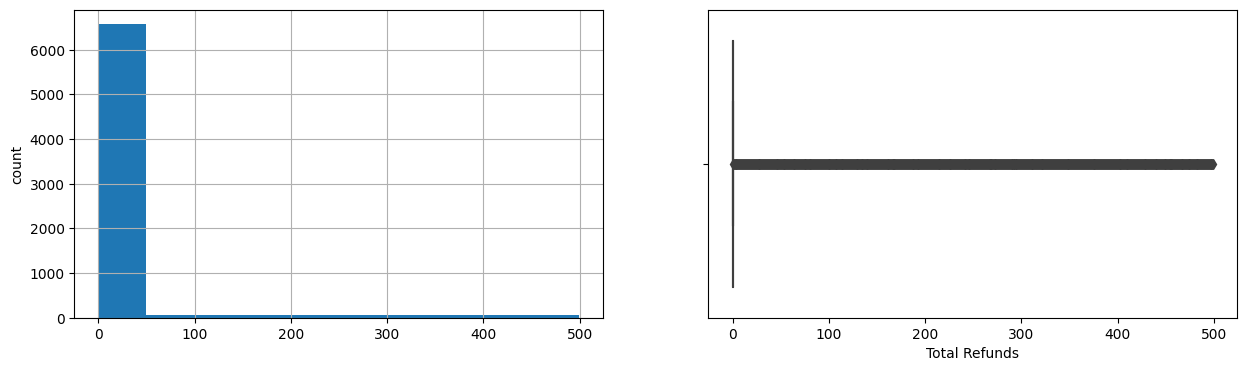

Total Extra Data Charges
Skew : 1.31


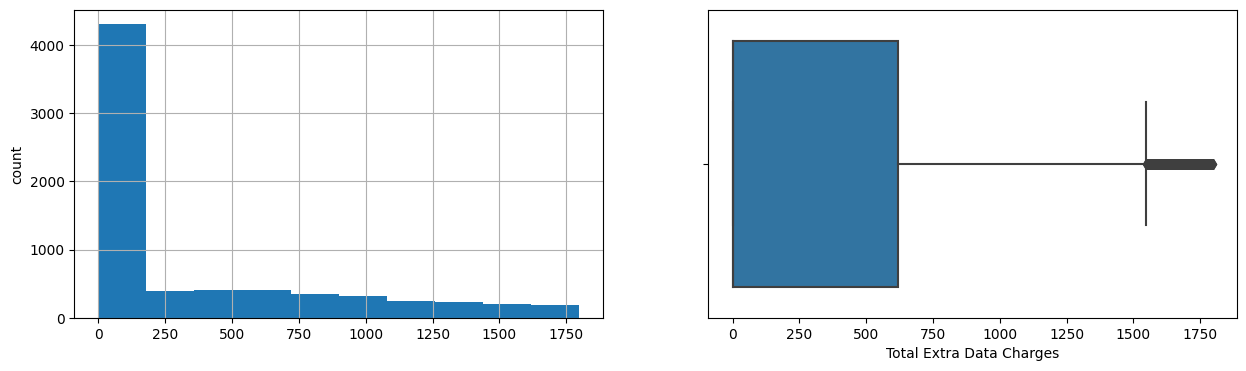

Total Long Distance Charges
Skew : 0.1


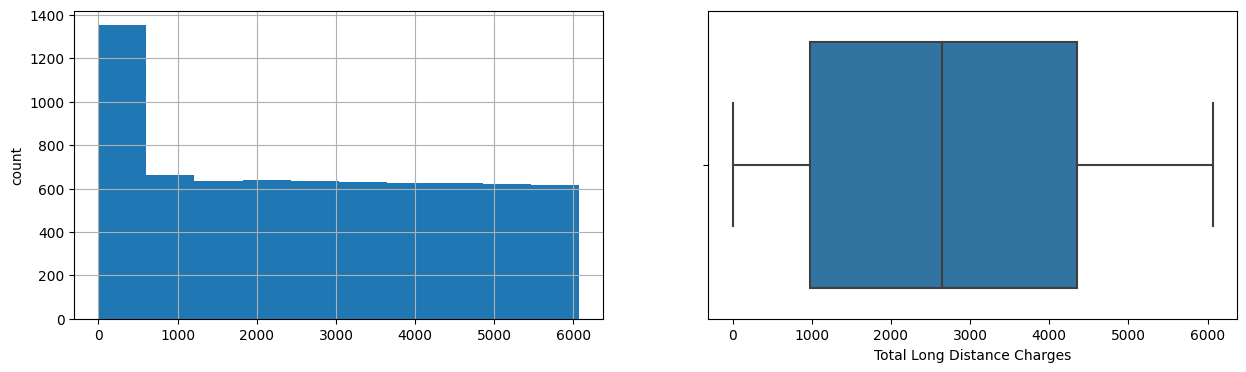

Gender
Skew : -0.02


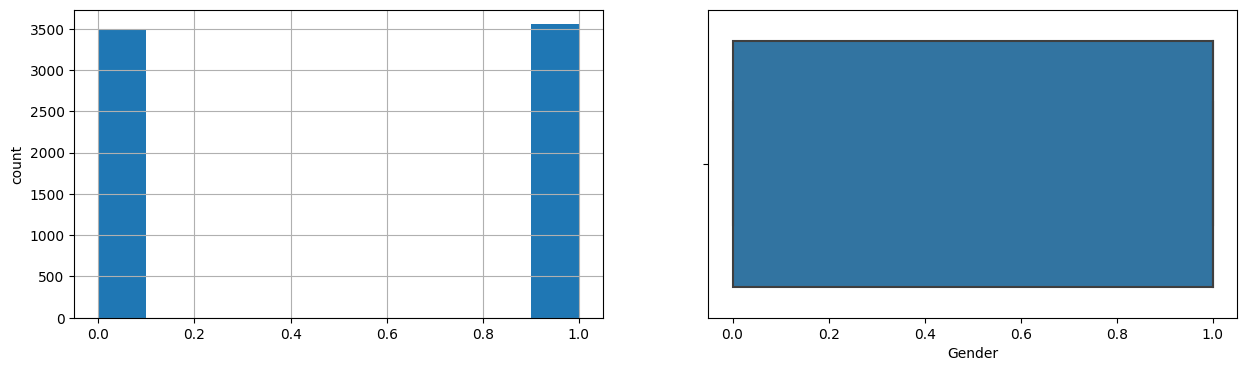

Age
Skew : 0.16


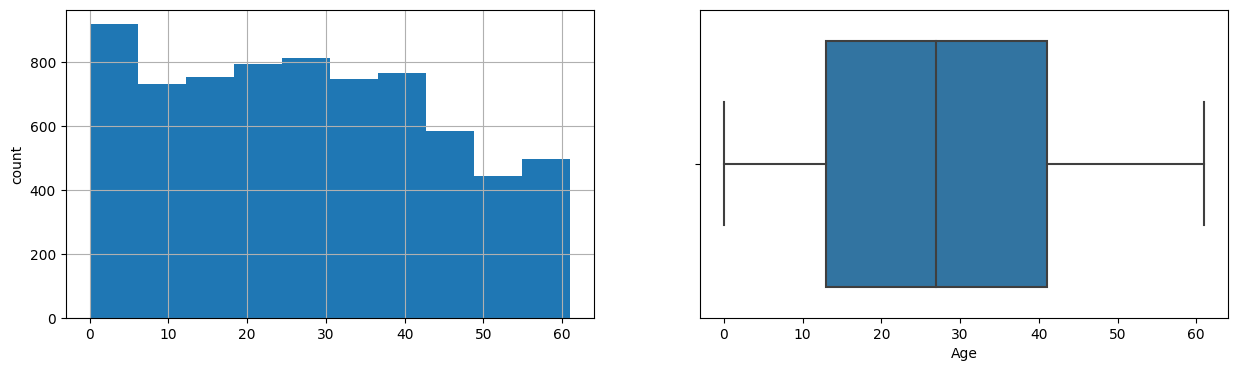

Under 30
Skew : 1.51


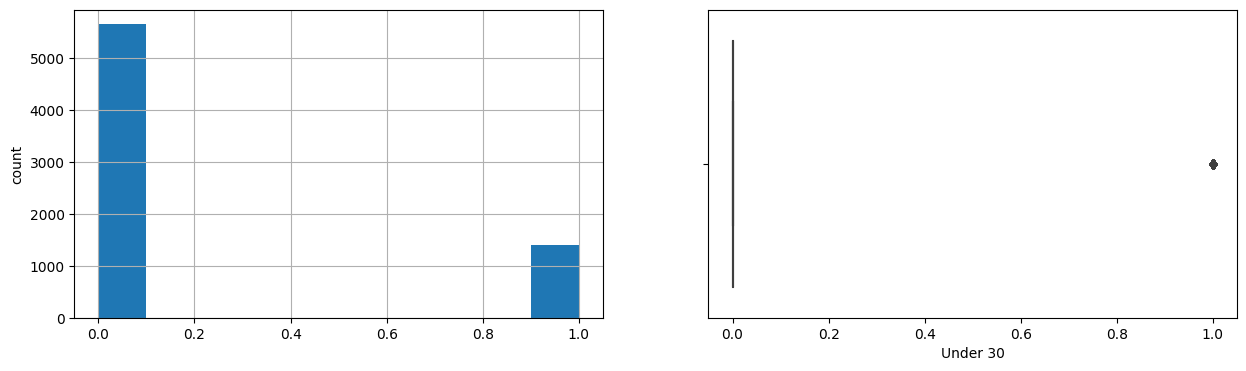

Senior Citizen
Skew : 1.83


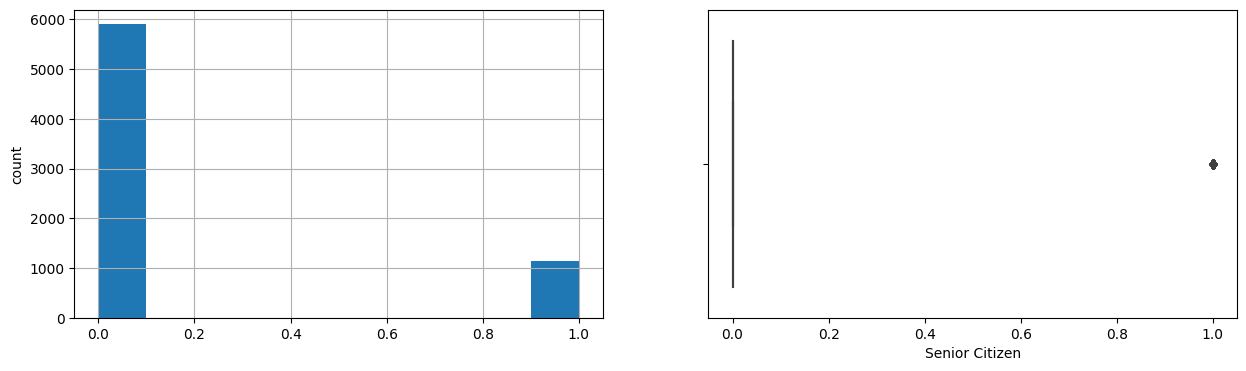

Married
Skew : 0.07


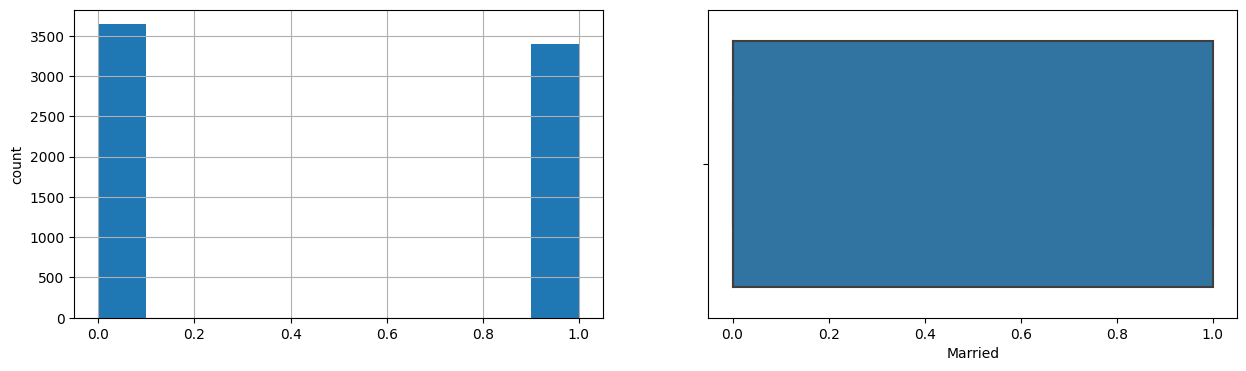

Dependents
Skew : 1.28


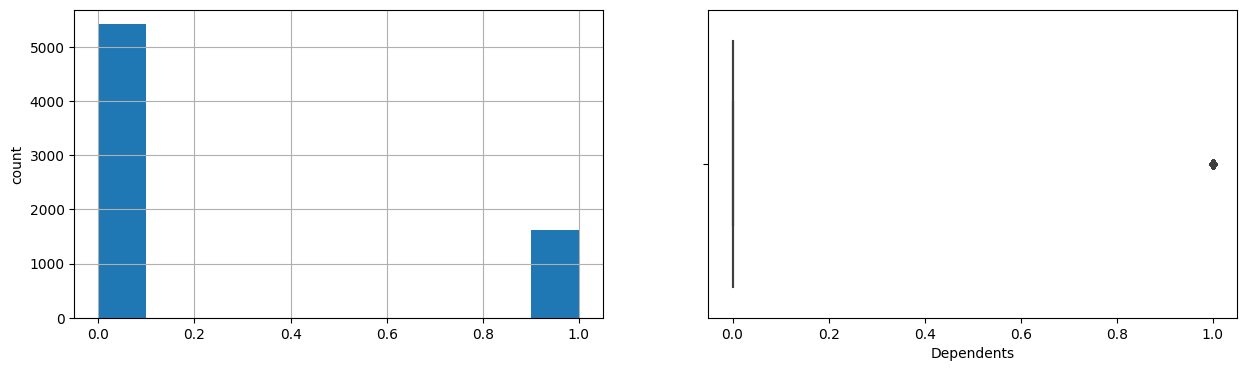

City
Skew : -0.21


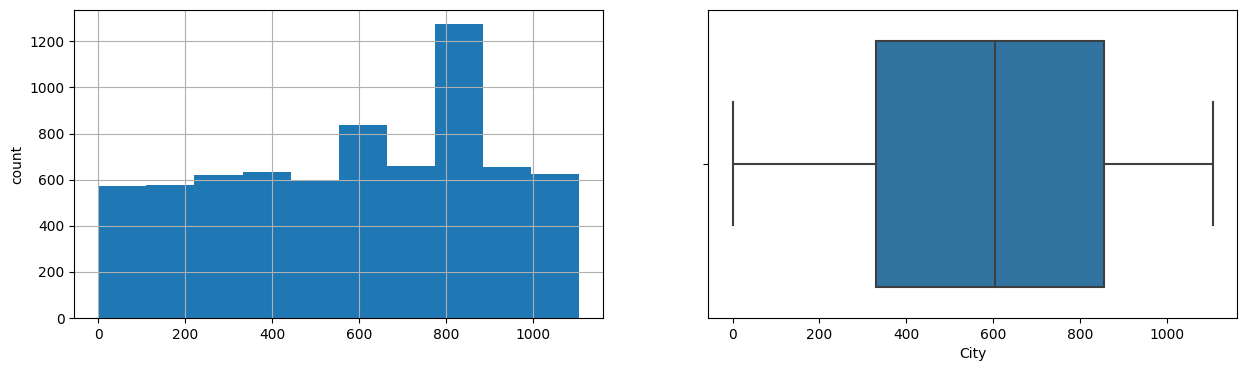

Zip Code
Skew : 0.13


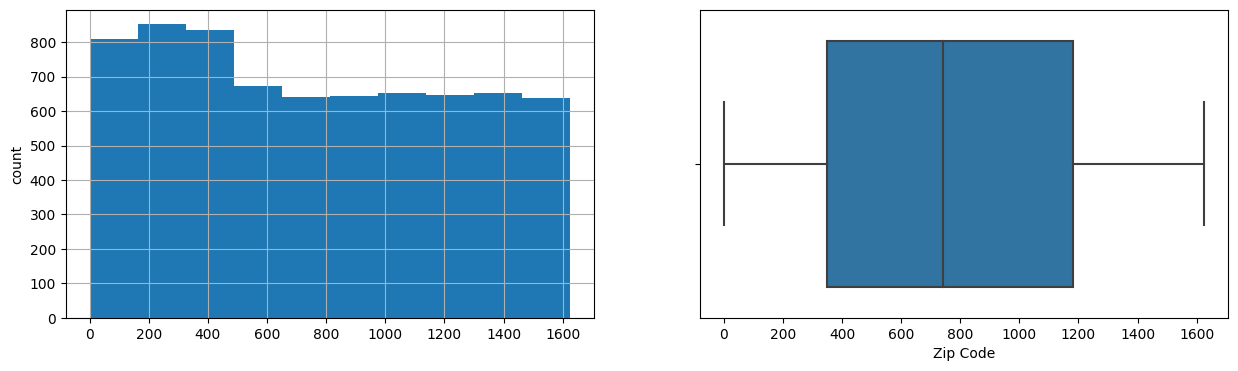

Population
Skew : -0.06


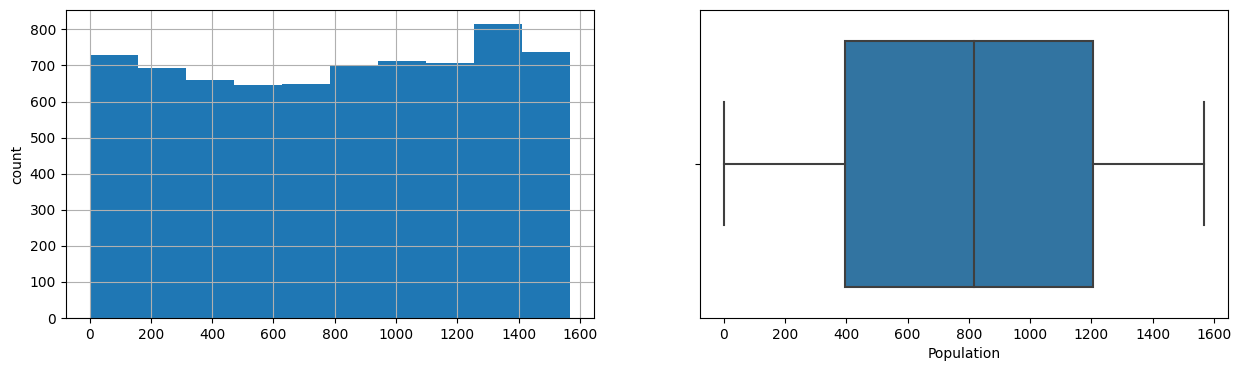

Churn Status
Skew : 1.06


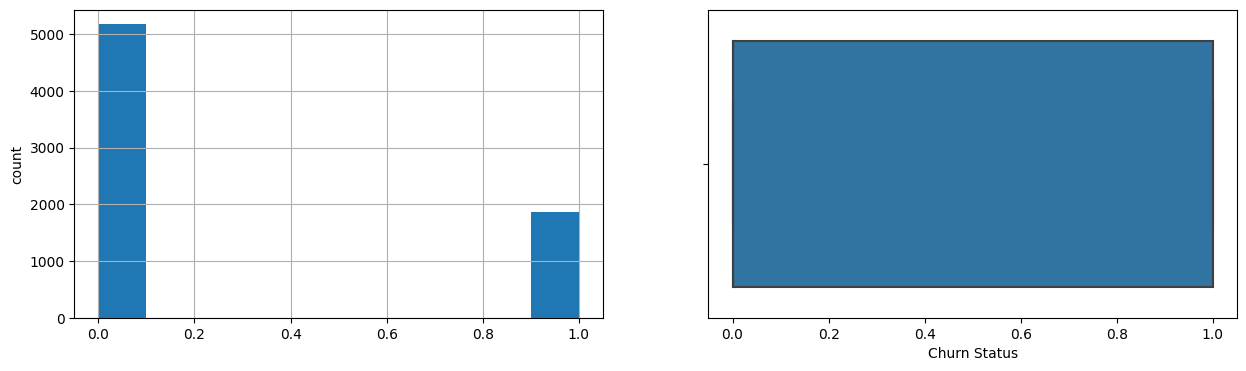

CLTV
Skew : -0.18


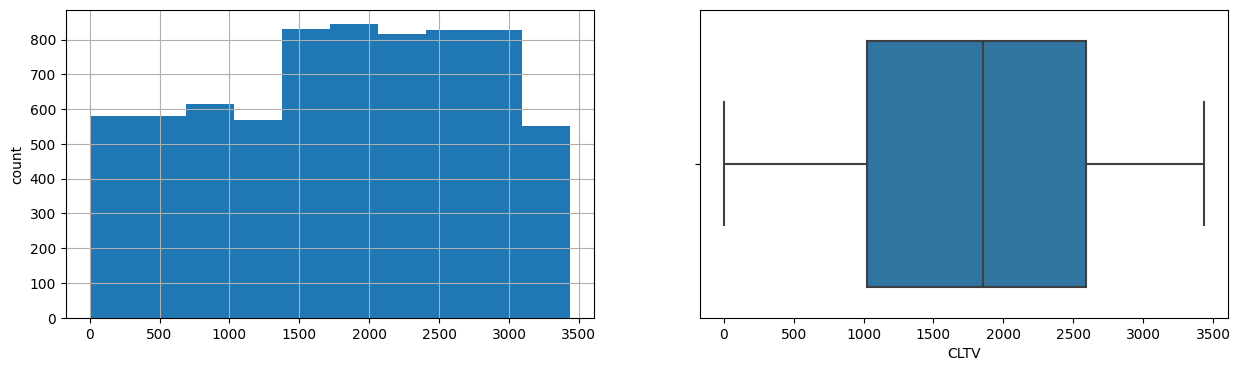

Churn Category
Skew : 2.77


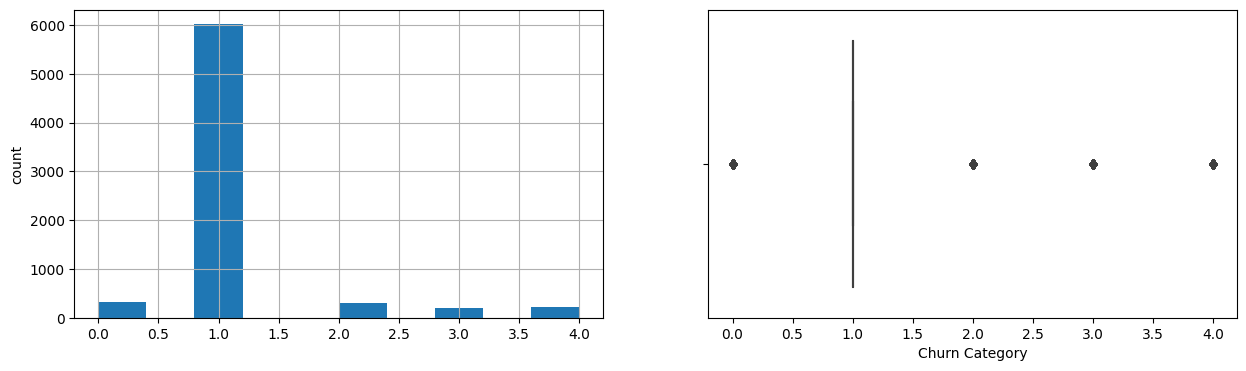

Churn Reason
Skew : -1.49


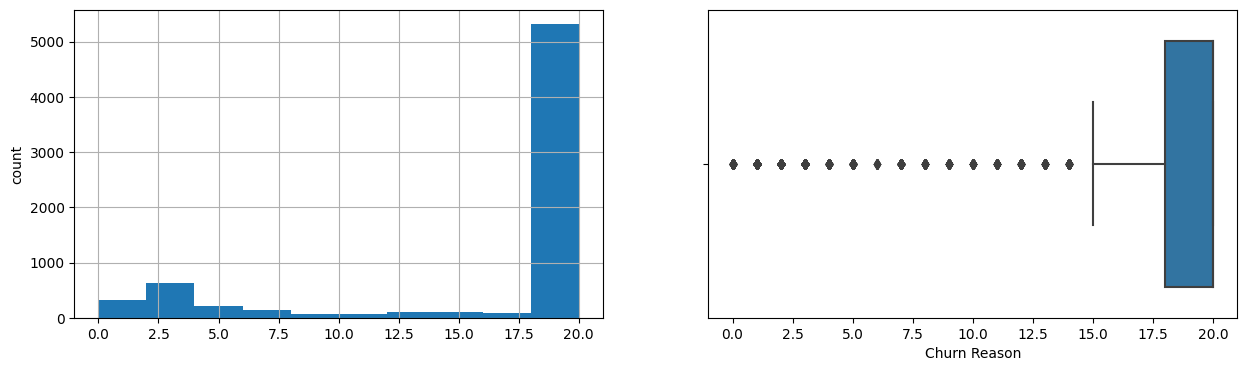

Total Customer Svc Requests
Skew : 1.36


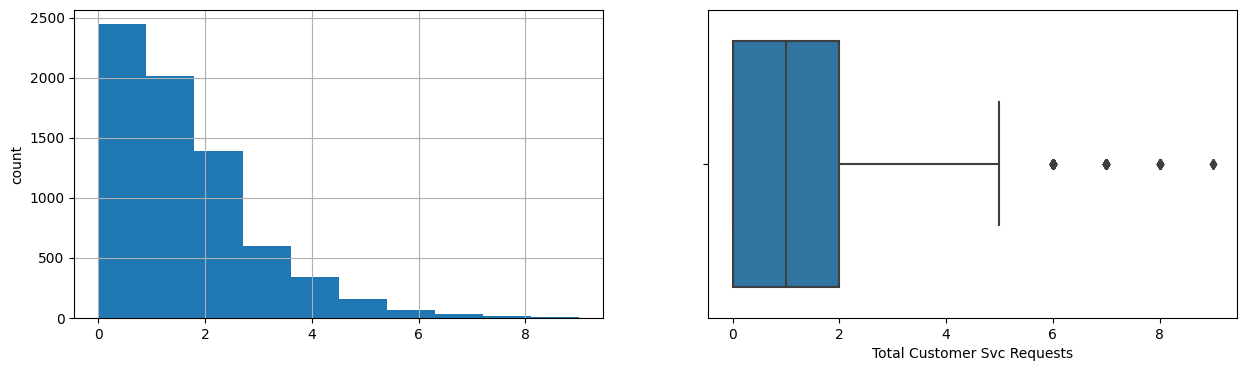

Product/Service Issues Reported
Skew : 2.91


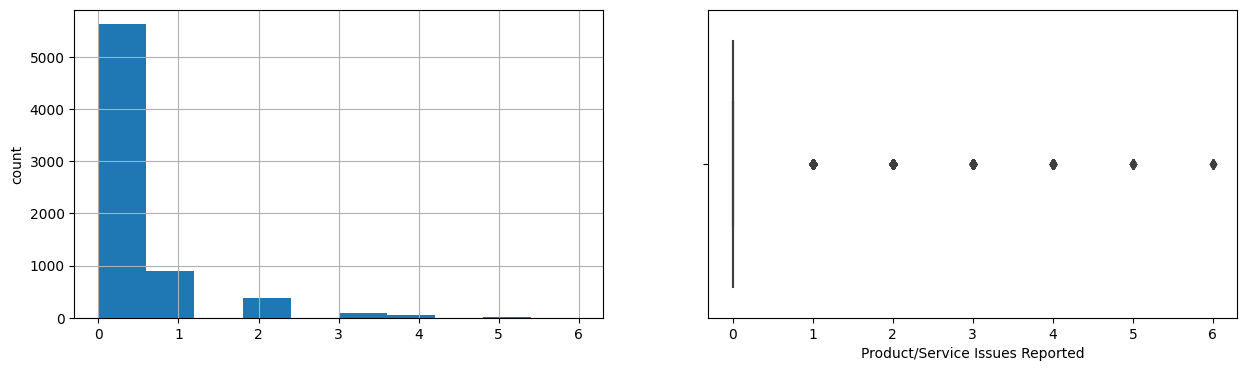

Customer Satisfaction rate
Skew : -0.28


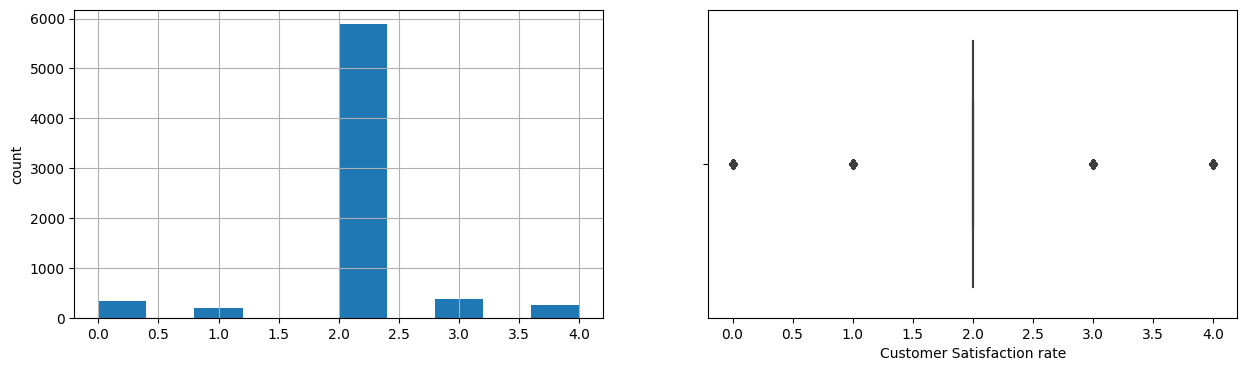

In [12]:
# Let's check the distribution and outliers for each column in the data

for col in df.columns:
     print(col)
     print('Skew :',round(df[col].skew(),2))
     plt.figure(figsize=(15,4))
     plt.subplot(1,2,1)
     df[col].hist()
     plt.ylabel('count')
     plt.subplot(1,2,2)
     sns.boxplot(x=df[col])
     plt.show()


If the skewness value is positive, it suggests a right-skewed distribution.
If the skewness value is negative, it suggests a left-skewed distribution.
If the skewness value is close to zero, it suggests a relatively symmetric distribution.

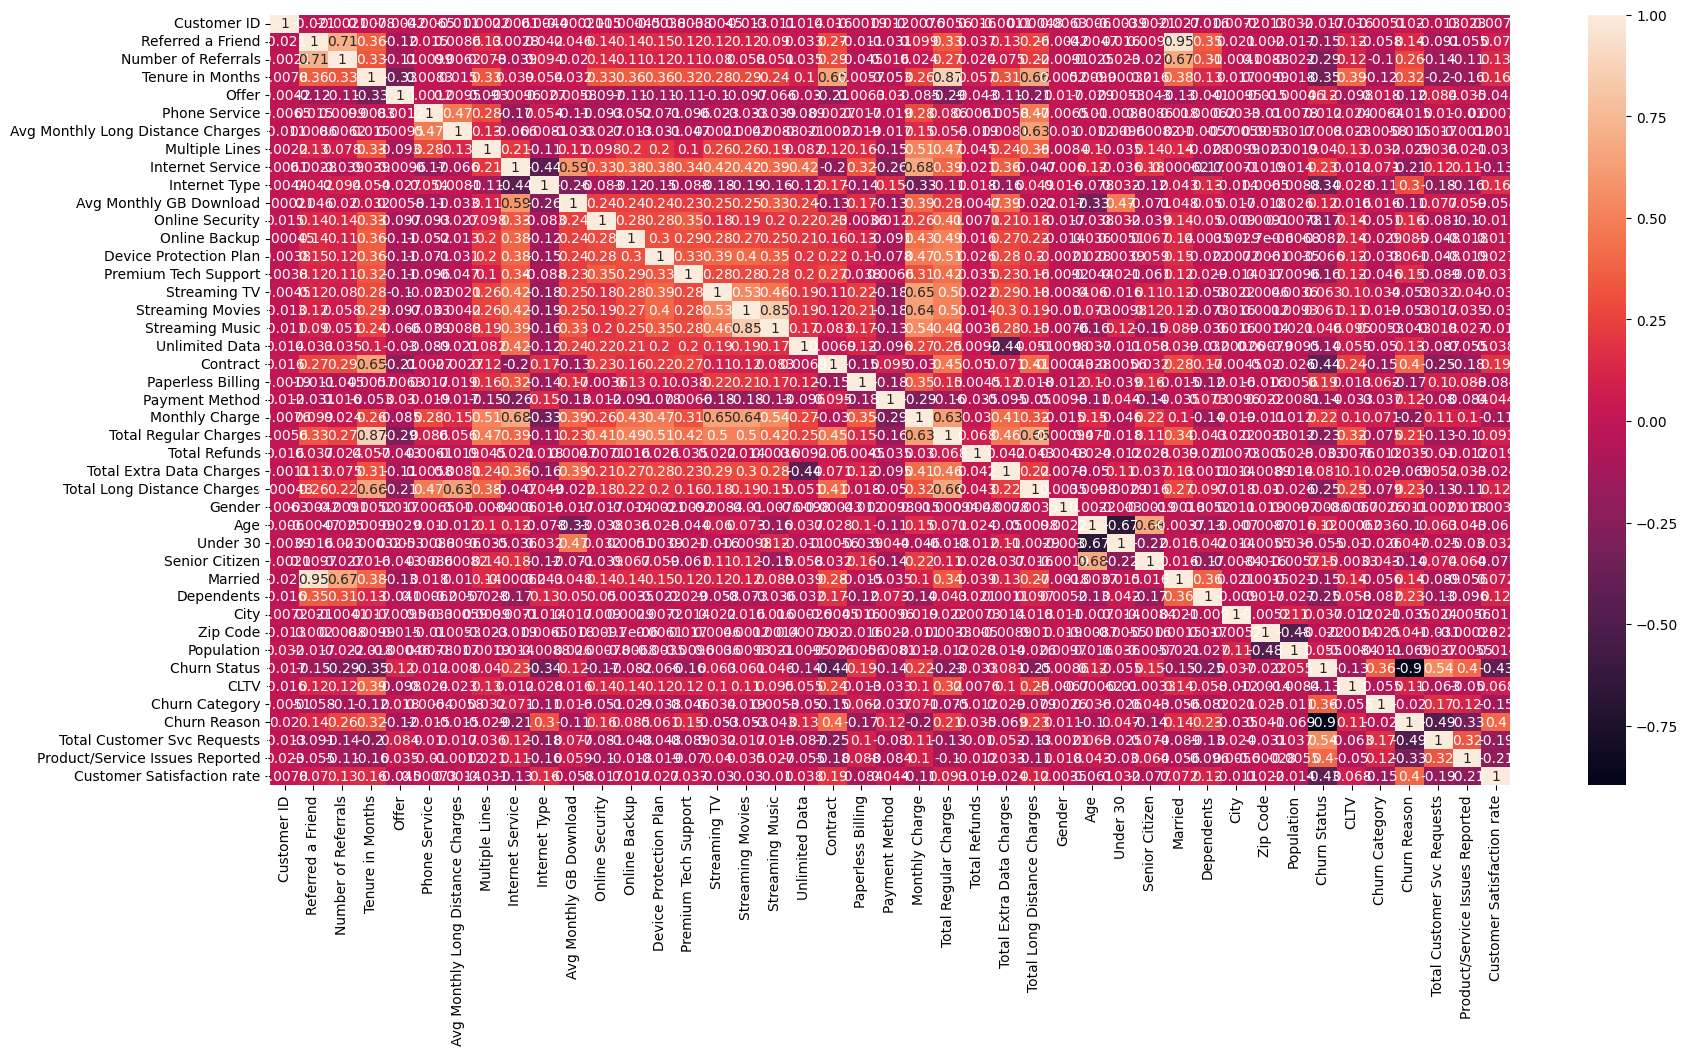

In [13]:
#Checking correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

A heatmap is a useful visualization for understanding the correlation structure of your dataset. 
The colors in the heatmap represent the strength and direction of the correlation:

Darker colors (closer to 1 or -1) indicate a stronger correlation.
Lighter colors (closer to 0) indicate a weaker or no correlation.

# scaling the data


In [14]:
 #scaling the data
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [15]:
data_scaled

Customer ID  Referred a Friend  Number of Referrals  Tenure in Months  \
0        1.321110          -0.918278            -0.650409         -1.278988   
1        0.877461           1.088995            -0.317185         -0.993743   
2       -1.176506          -0.918278            -0.650409         -0.586250   
3       -0.153949           1.088995            -0.317185         -0.301005   
4       -0.050169           1.088995            -0.317185          0.187986   
...           ...                ...                  ...               ...   
7038    -0.867132          -0.918278            -0.650409          1.614210   
7039     0.655145           1.088995            -0.317185         -0.341755   
7040    -0.981733           1.088995             0.682487          1.614210   
7041    -0.075745           1.088995            -0.317185         -0.871495   
7042    -0.636946          -0.918278            -0.650409          1.369715   

         Offer  Phone Service  Avg Monthly Long Distance Charges  \
0    -0.764620      -3.054010                          -1.448097   
1     1.970105       0.327438                           1.687791   
2     1.423160       0.327438                          -0.759796   
3     0.876215       0.327438                          -0.208619   
4     0.876215       0.327438                          -1.085126   
...        ...            ...                                ...   
7038 -0.764620       0.327438                          -0.024893   
7039  0.876215       0.327438                           0.844444   
7040 -0.764620       0.327438                           0.422323   
7041 -0.764620      -3.054010                          -1.448097   
7042 -0.764620       0.327438                           0.504776   

      Multiple Lines  Internet Service  Internet Type  ...      City  \
0          -0.854176          0.525927       0.835598  ... -0.110609   
1           1.170719          0.525927      -1.630922  ... -0.110609   
2           1.170719          0.525927       0.835598  ... -0.110609   
3          -0.854176          0.525927       0.835598  ... -0.455016   
4           1.170719          0.525927      -1.630922  ...  1.572434   
...              ...               ...            ...  ...       ...   
7038       -0.854176         -1.901403       0.835598  ... -0.240574   
7039        1.170719          0.525927      -0.397662  ... -1.904123   
7040        1.170719          0.525927      -1.630922  ... -1.839140   
7041       -0.854176          0.525927      -0.397662  ... -1.826144   
7042       -0.854176          0.525927       0.835598  ... -1.806649   

      Zip Code  Population  Churn Status      CLTV  Churn Category  \
0    -1.571229    1.574796      1.663829  0.894742       -0.216372   
1    -1.501821    1.420623      1.663829  0.773553       -0.216372   
2    -1.497615    1.264279      1.663829 -1.032577       -0.216372   
3    -1.405071    0.512959      1.663829  0.802256        1.274729   
4    -1.375626    0.447816      1.663829 -1.327043        4.256930   
...        ...         ...           ...       ...             ...   
7038 -0.717306   -0.898481     -0.601023  0.775679       -0.216372   
7039 -0.715203    0.100384     -0.601023 -1.804355       -0.216372   
7040 -0.713100   -1.717115     -0.601023  1.018056       -0.216372   
7041 -0.710997   -1.502142     -0.601023 -1.327043       -0.216372   
7042 -0.708893    0.565074     -0.601023  0.581140       -0.216372   

      Churn Reason  Total Customer Svc Requests  \
0        -1.695769                     2.559635   
1        -1.993629                     2.559635   
2        -1.993629                    -0.236845   
3        -0.802188                    -0.236845   
4        -1.248979                    -0.236845   
...            ...                          ...   
7038      0.538183                    -0.935965   
7039      0.538183                     0.462275   
7040      0.538183                     0.462275   
7041      0.538183      

In [16]:
#DecisionTreeClassifier

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report


In [18]:
features = ['Referred a Friend','Age','Population','Number of Referrals','Tenure in Months','Offer','Phone Service','Avg Monthly Long Distance Charges','Multiple Lines','Internet Service', 'Internet Type',
            'CLTV','Churn Category','Churn Reason','Total Customer Svc Requests','Product/Service Issues Reported','Customer Satisfaction rate']
X = df[features]
Y = df['Churn Status']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.80,random_state=42)
y_test





185     1
2715    0
3825    0
1807    1
132     1
       ..
6792    0
5000    0
1279    1
6281    0
6899    0
Name: Churn Status, Length: 5635, dtype: int64

In [19]:
#pre-pruning
parameter={
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()  #model obj creation
#model.fit(x_train,y_train)
cv=GridSearchCV(model,parameter,scoring='accuracy')
cv.fit(x_train,y_train)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [20]:
 best_model=cv.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

In [21]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='sqrt')  #model obj creation
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

[Text(0.4583333333333333, 0.875, 'x[2] <= 301.5\nentropy = 0.797\nsamples = 1408\nvalue = [1068, 340]'),
 Text(0.25, 0.625, 'x[12] <= 1.5\nentropy = 0.653\nsamples = 262\nvalue = [218, 44]'),
 Text(0.16666666666666666, 0.375, 'x[3] <= 1.5\nentropy = 0.501\nsamples = 245\nvalue = [218, 27]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.636\nsamples = 168\nvalue = [141, 27]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 77\nvalue = [77, 0]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.6666666666666666, 0.625, 'x[3] <= 1.5\nentropy = 0.824\nsamples = 1146\nvalue = [850, 296]'),
 Text(0.5, 0.375, 'x[15] <= 0.5\nentropy = 0.926\nsamples = 808\nvalue = [532, 276]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.789\nsamples = 614\nvalue = [469, 145]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.909\nsamples = 194\nvalue = [63, 131]'),
 Text(0.8333333333333334, 0.375, 'x[13] <= 19.0\nentropy = 0.324\nsamples = 338\nvalue = [318, 20]'),
 Te

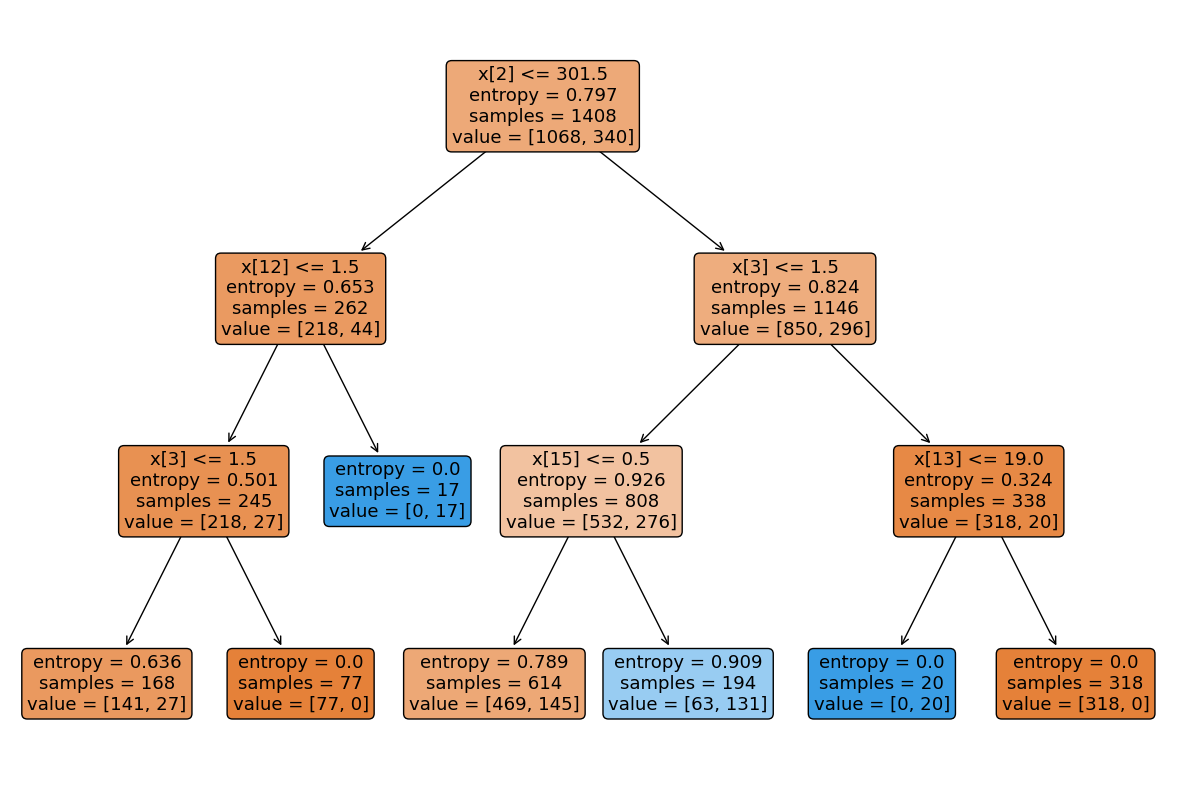

In [22]:
plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=None, class_names=None, filled=True, rounded=True)

In [23]:
#Post Pruning
#model=DecisionTreeClassifier()
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphasy_pred=cv.predict(df[features])
print(ccp_alphas)

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

[0 0 0 ... 0 0 1]


In [24]:
y_pred=cv.predict(df[features])
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [25]:
score=accuracy_score(y_pred,df['Churn Status'])

score

0.8162714752236263

In [26]:
y_pred1=clf.predict(df[features])

y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
score1=accuracy_score(y_pred1,df['Churn Status'])
score1 

0.7346301292063041

In [28]:
model1 = DecisionTreeClassifier()

In [29]:
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred2=model1.predict(df[features])
y_pred2

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [31]:
score2=accuracy_score(y_pred1,df['Churn Status'])

score2

0.7346301292063041

In [32]:
#kNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  classification_report

# Create a KNN classifier with a specified number of neighbors (k)
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Fit the KNN classifier to the training data
knn.fit(x_train, y_train)

# Make predictions on the test data
y_pred3 = knn.predict(x_test)

In [33]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


In [34]:
# Generate a classification report
class_report = classification_report(y_test, y_pred3)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80      4106
           1       0.31      0.13      0.19      1529

    accuracy                           0.68      5635
   macro avg       0.52      0.51      0.50      5635
weighted avg       0.62      0.68      0.64      5635



In [35]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[3653  453]
 [1325  204]]


In [36]:
from sklearn.metrics import f1_score


#F1 score
f1_score_test = f1_score(y_test, y_pred3, average='macro')
print('F1 score:\n', f1_score_test)

F1 score:
 0.4954567575657592


In [37]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier


rclf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
#gd=GridSearchCV(rclf,parameter)
clf.fit(x_train, y_train)
y_pred4 = clf.predict(x_test)
accuracy_score(y_test, y_pred4)

0.7286601597160604

In [38]:
# Generate a classification report
class_report = classification_report(y_test, y_pred4)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84      4106
           1       0.00      0.00      0.00      1529

    accuracy                           0.73      5635
   macro avg       0.36      0.50      0.42      5635
weighted avg       0.53      0.73      0.61      5635



C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [39]:
#Fit a AdaBoost model,
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred5 = clf.predict(x_test)
accuracy_score(y_test, y_pred5)

1.0

In [40]:
# Generate a classification report
class_report = classification_report(y_test, y_pred5)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4106
           1       1.00      1.00      1.00      1529

    accuracy                           1.00      5635
   macro avg       1.00      1.00      1.00      5635
weighted avg       1.00      1.00      1.00      5635



In [41]:
# Fit a Gradient Boosting model, "
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred6 = clf.predict(x_test)
accuracy_score(y_test, y_pred6)

1.0

In [42]:
# Generate a classification report
class_report = classification_report(y_test, y_pred6)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4106
           1       1.00      1.00      1.00      1529

    accuracy                           1.00      5635
   macro avg       1.00      1.00      1.00      5635
weighted avg       1.00      1.00      1.00      5635



In [43]:
import xgboost as xgb
my_model = xgb.XGBClassifier()
my_model.fit(x_train, y_train)
y_pred7 = my_model.predict(x_test)
accuracy_score(y_test, y_pred7)

1.0

In [44]:
#KNN with Parameter Tuning



# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Test different values of n_neighbors
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Number of Neighbors:", best_params['n_neighbors'])

# Get the best trained model
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred9 = best_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred9)
print(f'Accuracy with Best Model: {accuracy:.2f}')


Best Number of Neighbors: 11
Accuracy with Best Model: 0.71


In [45]:
 #Generate a classification report
class_report = classification_report(y_test, y_pred9)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.95      0.83      4106
           1       0.37      0.08      0.12      1529

    accuracy                           0.71      5635
   macro avg       0.55      0.51      0.48      5635
weighted avg       0.64      0.71      0.64      5635



In [46]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred9)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[3909  197]
 [1414  115]]


In [47]:
# "Support vector classifier"
from sklearn.svm import SVC 
model = SVC(kernel = 'rbf', C = 3)
model.fit(x_train, y_train)
y_pred10 = model.predict(x_test)
accuracy_score(y_test, y_pred10)

0.7286601597160604

In [49]:
#Generate a classification report
class_report = classification_report(y_test, y_pred10)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84      4106
           1       0.00      0.00      0.00      1529

    accuracy                           0.73      5635
   macro avg       0.36      0.50      0.42      5635
weighted avg       0.53      0.73      0.61      5635



C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
Here we get precision for customers donot churn=73% and customers can churn=0%
Here we get recall for customers donot churn=100% and customers can churn=0%

Here we get f1-score for customers donot churn=84% and customers can churn=0%

accuracy score is 80%

In [50]:


# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred10)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[4106    0]
 [1529    0]]


# Principal Component Analysis


In [51]:
#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


#Defining the number of principal components to generate 
n=data_scaled.shape[1]  #

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1) #Apply the PCA algorithm with random state = 1

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled)) #Fit and transform the pca function on scaled data

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

for i in range(n):
    print(pca.explained_variance_ratio_[i])

0.15421374285071307
0.11019863994279398
0.060691708538980475
0.051334986815889695
0.049212864841881795
0.035621373478093674
0.03472128151935903
0.029523215687501346
0.02776264992471651
0.025089861728561643
0.024162345916018173
0.02334700582574376
0.023240407370729303
0.02275976750677508
0.022664101749562765
0.021061432478993784
0.01996140932713675
0.01940573996523195
0.01915240292250776
0.018233888069280967
0.017932063294401047
0.017371512669277
0.016583123672330873
0.016155352370543812
0.015646241293371096
0.015281939347002933
0.01445730672487846
0.012772398018972385
0.01236483790278013
0.0118272401395579
0.01124032346301289
0.010052994791997989
0.008768546034250646
0.0077346366930547295
0.004770612053283441
0.0033632409851534896
0.002736590504299332
0.002557781911122958
0.0018827138573814406
0.0016084840828828068
0.001107377264887471
0.0008986742446558194
0.0005271822204297558


Text(0, 0.5, 'Cumulative Explained Variance')

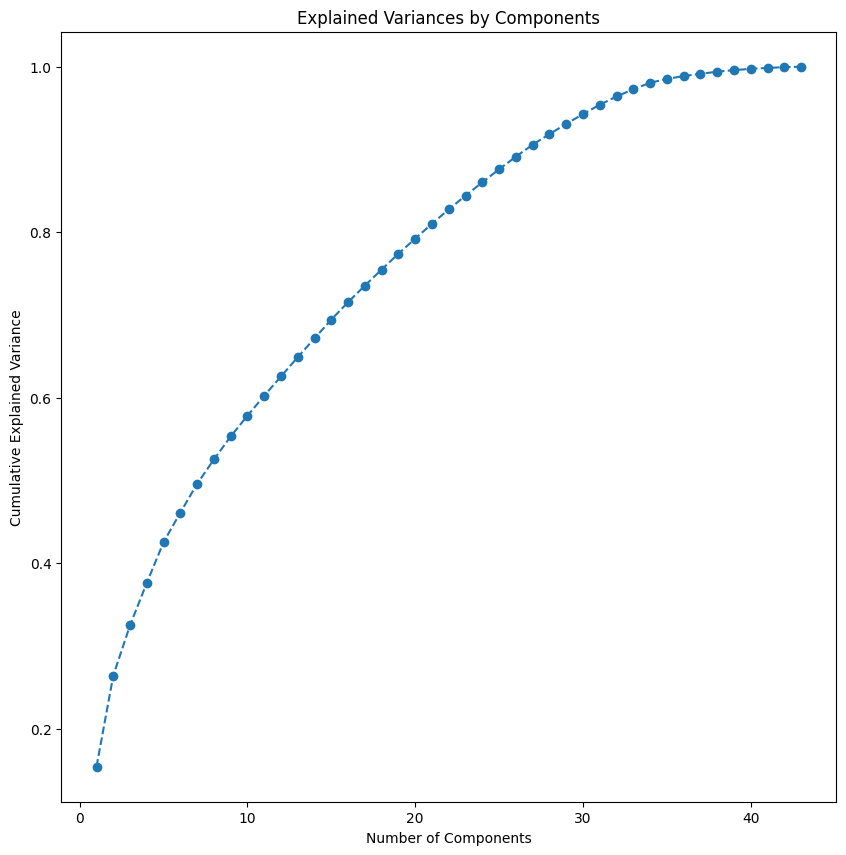

In [52]:
# visulaize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,len(exp_var) + 1), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")



In [53]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  27


In [54]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

PC1   PC2   PC3
Customer ID                       -0.00 -0.00  0.01
Referred a Friend                  0.16 -0.17 -0.08
Number of Referrals                0.14 -0.21 -0.04
Tenure in Months                   0.28 -0.19 -0.09
Offer                             -0.11  0.08  0.06
Phone Service                      0.03 -0.02 -0.28
Avg Monthly Long Distance Charges  0.04 -0.02 -0.23
Multiple Lines                     0.19  0.06 -0.20
Internet Service                   0.21  0.27  0.13
Internet Type                     -0.07 -0.23 -0.02
Avg Monthly GB Download            0.15  0.16  0.34
Online Security                    0.18 -0.03  0.13
Online Backup                      0.22  0.03  0.05
Device Protection Plan             0.23  0.05  0.07
Premium Tech Support               0.20 -0.01  0.15
Streaming TV                       0.24  0.13  0.01
Streaming Movies                   0.25  0.14  0.05
Streaming Music                    0.23  0.12  0.18
Unlimited Data                     0.12  0.04  0.11
Contract                           0.16 -0.26 -0.07
Paperless Billing                  0.09  0.17 -0.05
Payment Method                    -0.08 -0.13  0.08
Monthly Charge                     0.29  0.23 -0.08
Total Regular Charges              0.36 -0.05 -0.07
Total Refunds                      0.03 -0.02 -0.03
Total Extra Data Charges           0.19  0.08  0.04
Total Long Distance Charges        0.22 -0.15 -0.25
Gender                            -0.01 -0.01 -0.01
Age                                0.01  0.08 -0.44
Under 30                           0.01 -0.02  0.37
Senior Citizen                     0.04  0.11 -0.34
Married                            0.17 -0.18 -0.08
Dependents                         0.03 -0.19  0.06
City                               0.01  0.01 -0.00
Zip Code                           0.00 -0.02  0.00
Population                        -0.00  0.03  0.02
Churn Status                      -0.07  0.36 -0.11
CLTV                               0.12 -0.08 -0.05
Churn Category                    -0.03  0.12 -0.05
Churn Reason                       0.07 -0.33  0.10
Total Customer Svc Requests       -0.05  0.23 -0.08
Product/Service Issues Reported   -0.03  0.19 -0.07
Customer Satisfaction rate         0.03 -0.19  0.06

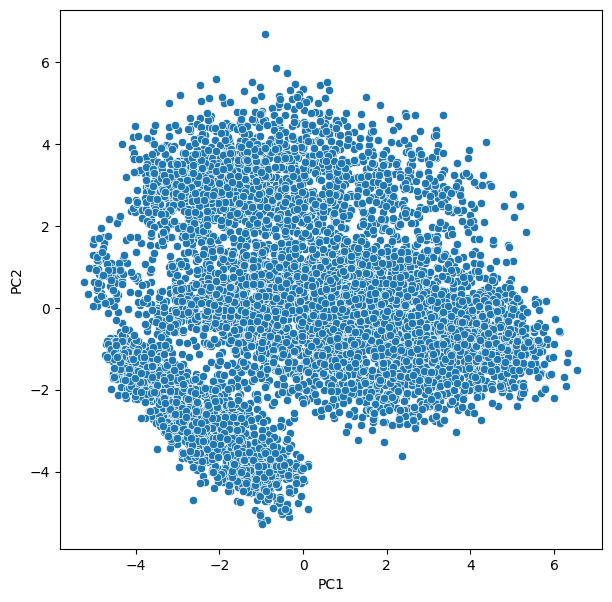

In [55]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Text(0, 0.5, 'PC2')

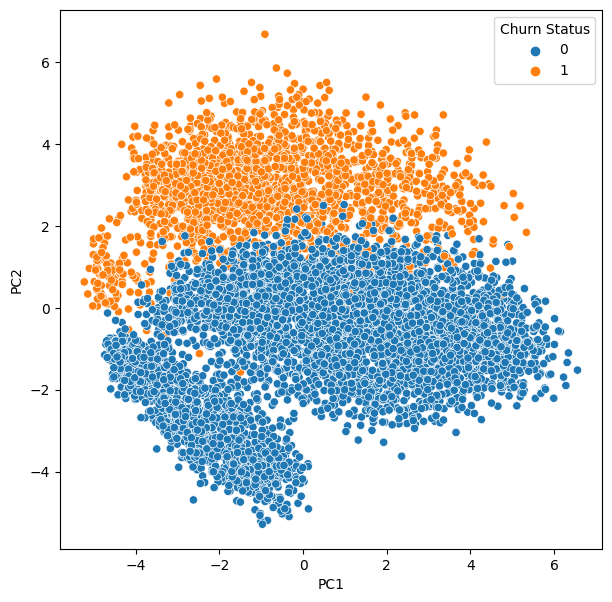

In [56]:
#Let's try adding hue to the scatter plot

df_concat = pd.concat([data_pca1, df], axis=1)

plt.figure(figsize = (7,7))
#Create a scatter plot with x=0 and y=1 using df_concat dataframe
sns.scatterplot(data = df_concat, x=df_concat[0], y=df_concat[1], hue ='Churn Status')
plt.xlabel("PC1")
plt.ylabel("PC2")

In [57]:
df2=pd.read_csv("verizonet_data (1).csv")

df2

Customer ID Referred a Friend  Number of Referrals  Tenure in Months  \
0     8779-QRDMV                No                    0                 1   
1     7495-OOKFY               Yes                    1                 8   
2     1658-BYGOY                No                    0                18   
3     4598-XLKNJ               Yes                    1                25   
4     4846-WHAFZ               Yes                    1                37   
...          ...               ...                  ...               ...   
7038  2569-WGERO                No                    0                72   
7039  6840-RESVB               Yes                    1                24   
7040  2234-XADUH               Yes                    4                72   
7041  4801-JZAZL               Yes                    1                11   
7042  3186-AJIEK                No                    0                66   

        Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0         NaN            No                               0.00             No   
1     Offer E           Yes                              48.85            Yes   
2     Offer D           Yes                              11.33            Yes   
3     Offer C           Yes                              19.76             No   
4     Offer C           Yes                               6.33            Yes   
...       ...           ...                                ...            ...   
7038      NaN           Yes                              22.77             No   
7039  Offer C           Yes                              36.05            Yes   
7040      NaN           Yes                              29.66            Yes   
7041      NaN            No                               0.00             No   
7042      NaN           Yes                              30.96             No   

     Internet Service Internet Type  ...          City Zip Code Population  \
0                 Yes   Fiber Optic  ...   Los Angeles    90022      68701   
1                 Yes         Cable  ...   Los Angeles    90063      55668   
2                 Yes   Fiber Optic  ...   Los Angeles    90065      47534   
3                 Yes   Fiber Optic  ...     Inglewood    90303      27778   
4                 Yes         Cable  ...      Whittier    90602      26265   
...               ...           ...  ...           ...      ...        ...   
7038               No           NaN  ...       Landers    92285       2182   
7039              Yes           DSL  ...      Adelanto    92301      18980   
7040              Yes         Cable  ...         Amboy    92304         42   
7041              Yes           DSL  ...  Angelus Oaks    92305        301   
7042              Yes   Fiber Optic  ...  Apple Valley    92308      28819   

     Churn Status  CLTV   Churn Category                  Churn Reason  \
0               1  5433       Competitor  Competitor offered more data   
1               1  5302       Competitor  Competitor made better offer   
2               1  3179       Competitor  Competitor made better offer   
3               1  5337  Dissatisfaction     Limited range of services   
4               1  2793            Price            Extra data charges   
...           ...   ...              ...                           ...   
7038            0  5306              NaN                           NaN   
7039            0  2140              NaN                           NaN   
7040            0  5560              NaN                           NaN   
7041            0  2793              NaN                           NaN   
7042            0  5097              NaN                           NaN   

     Total Customer Svc Requests Product/Service Issues Reported  \
0                              5                               0   
1                              5                               0   
2                              1                               0   
3        

In [58]:
#Imputing the missing values with median value

df2['Customer Satisfaction rate'] = df['Customer Satisfaction rate'].fillna(3)


df2['Offer'] = df['Offer'].fillna('NO')

df2['Internet Type'] = df['Internet Type'].fillna('Fiber Optic')
df2['Churn Category'] = df['Churn Category'].fillna('Competitor')

df2

Customer ID Referred a Friend  Number of Referrals  Tenure in Months  \
0     8779-QRDMV                No                    0                 1   
1     7495-OOKFY               Yes                    1                 8   
2     1658-BYGOY                No                    0                18   
3     4598-XLKNJ               Yes                    1                25   
4     4846-WHAFZ               Yes                    1                37   
...          ...               ...                  ...               ...   
7038  2569-WGERO                No                    0                72   
7039  6840-RESVB               Yes                    1                24   
7040  2234-XADUH               Yes                    4                72   
7041  4801-JZAZL               Yes                    1                11   
7042  3186-AJIEK                No                    0                66   

      Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0         0            No                               0.00             No   
1         5           Yes                              48.85            Yes   
2         4           Yes                              11.33            Yes   
3         3           Yes                              19.76             No   
4         3           Yes                               6.33            Yes   
...     ...           ...                                ...            ...   
7038      0           Yes                              22.77             No   
7039      3           Yes                              36.05            Yes   
7040      0           Yes                              29.66            Yes   
7041      0            No                               0.00             No   
7042      0           Yes                              30.96             No   

     Internet Service  Internet Type  ...          City Zip Code Population  \
0                 Yes              2  ...   Los Angeles    90022      68701   
1                 Yes              0  ...   Los Angeles    90063      55668   
2                 Yes              2  ...   Los Angeles    90065      47534   
3                 Yes              2  ...     Inglewood    90303      27778   
4                 Yes              0  ...      Whittier    90602      26265   
...               ...            ...  ...           ...      ...        ...   
7038               No              2  ...       Landers    92285       2182   
7039              Yes              1  ...      Adelanto    92301      18980   
7040              Yes              0  ...         Amboy    92304         42   
7041              Yes              1  ...  Angelus Oaks    92305        301   
7042              Yes              2  ...  Apple Valley    92308      28819   

     Churn Status  CLTV Churn Category                  Churn Reason  \
0               1  5433              1  Competitor offered more data   
1               1  5302              1  Competitor made better offer   
2               1  3179              1  Competitor made better offer   
3               1  5337              2     Limited range of services   
4               1  2793              4            Extra data charges   
...           ...   ...            ...                           ...   
7038            0  5306              1                           NaN   
7039            0  2140              1                           NaN   
7040            0  5560              1                           NaN   
7041            0  2793              1                           NaN   
7042            0  5097              1                           NaN   

     Total Customer Svc Requests Product/Service Issues Reported  \
0                              5                               0   
1                              5                               0   
2                              1                               0   
3                              1             

In [59]:
churn_status_counts = df2['Churn Status'].value_counts()
print(churn_status_counts)

Churn Status
0    5174
1    1869
Name: count, dtype: int64


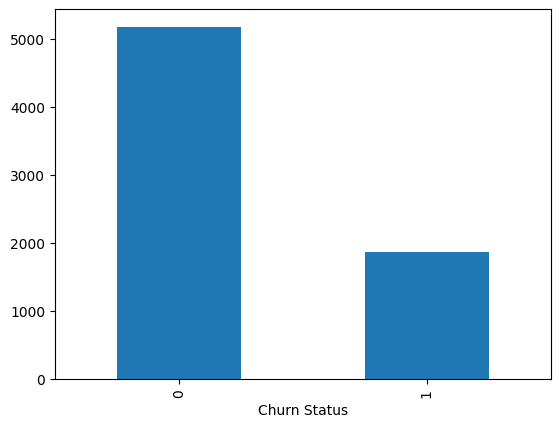

In [60]:
df['Churn Status'].value_counts().plot(kind='bar')
plt.show()

In [61]:
percentage_churn_status = df2['Churn Status'].value_counts(normalize=True) * 100
print(f"Percentage Churn Status:\n{percentage_churn_status}")

Percentage Churn Status:
Churn Status
0    73.463013
1    26.536987
Name: proportion, dtype: float64


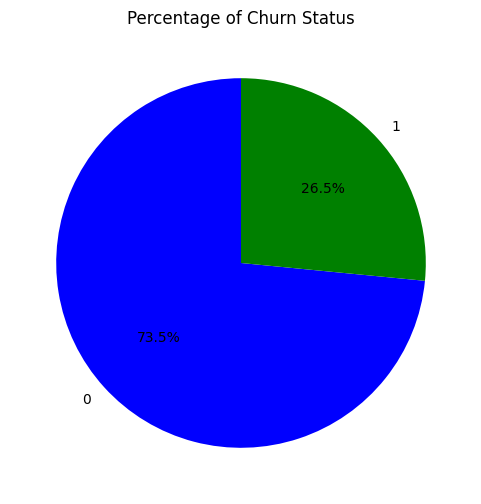

In [62]:
plt.figure(figsize=(6, 6))
plt.pie(percentage_churn_status, labels=percentage_churn_status.index, autopct='%1.1f%%', startangle=90, colors=['blue','green'])
plt.title('Percentage of Churn Status')
plt.show()

In [63]:
# 73.5% people retained the connection and 26.5% left the connection

In [64]:
gender_counts = df2['Gender'].value_counts()
print(gender_counts)

Gender
Male      3555
Female    3488
Name: count, dtype: int64


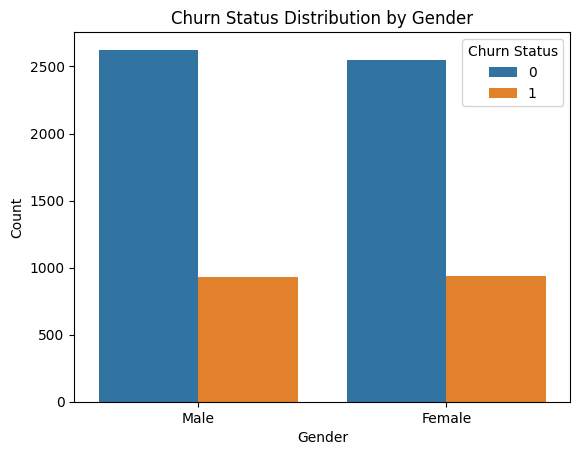

In [65]:
sns.countplot(x='Gender', hue='Churn Status', data=df2)
plt.title('Churn Status Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

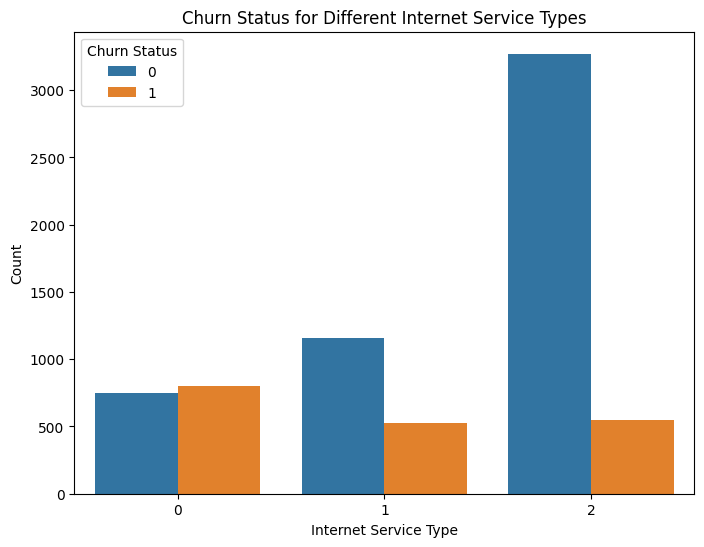

In [66]:
internet_service_counts = df2.groupby(['Internet Type', 'Churn Status']).size().reset_index(name='Count')

plt.figure(figsize=(8, 6))
sns.barplot(x='Internet Type', y='Count', hue='Churn Status', data=internet_service_counts)
plt.title('Churn Status for Different Internet Service Types')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()

In [67]:
cc = df2['Churn Category'].value_counts()
print(cc)

Churn Category
1    6015
0     314
2     303
4     211
3     200
Name: count, dtype: int64


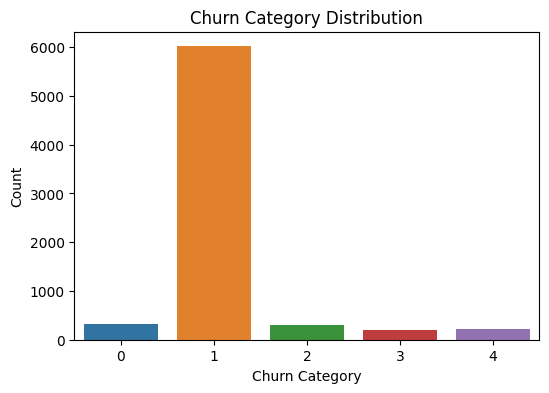

In [68]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn Category', data=df2)
plt.title('Churn Category Distribution')
plt.xlabel('Churn Category')
plt.ylabel('Count')
plt.show()

In [69]:
ud = df['Unlimited Data'].value_counts()
print(ud)

Unlimited Data
0    4339
1    2704
Name: count, dtype: int64


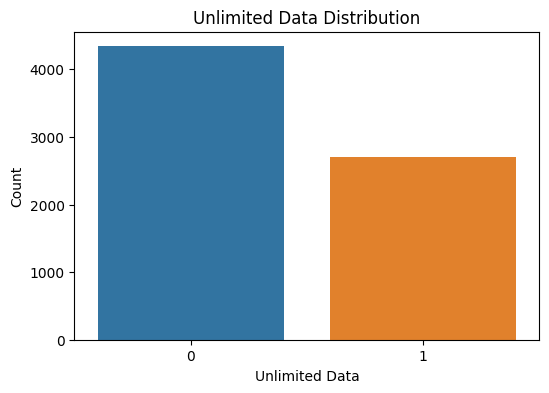

In [70]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Unlimited Data', data=df)
plt.title('Unlimited Data Distribution')
plt.xlabel('Unlimited Data')
plt.ylabel('Count')
plt.show()

In [71]:


# Count the number of customers above 60
above_60_count = len(df[df['Age'] > 60])


print(f'The number of customers above 60 years old is: {above_60_count}')


The number of customers above 60 years old is: 66


In [72]:
# Count the number of customers above 40 and below 60
between_40_and_60_count = len(df[(df['Age'] > 40) & (df['Age'] < 60)])

print(f'The number of customers between 40 and 60 years old is: {between_40_and_60_count}')

The number of customers between 40 and 60 years old is: 1640


In [73]:
between_20_and_40_count = len(df[(df['Age'] > 20) & (df['Age'] < 40)])

print(f'The number of customers between 40 and 60 years old is: {between_20_and_40_count}')

The number of customers between 40 and 60 years old is: 2472


In [74]:
# Count the number of customers BELOW 20
count = len(df[df['Age'] <20])


print(f'The number of customers BELOW 20 years old is: {count}')


The number of customers BELOW 20 years old is: 2533


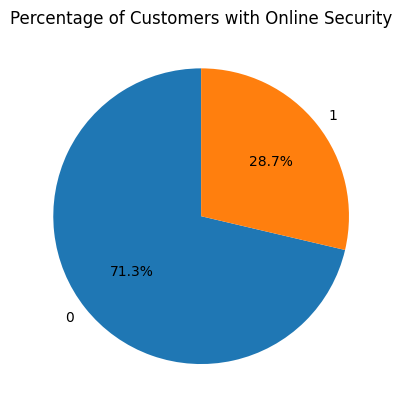

In [75]:
online_security_percentage = (df['Online Security'].value_counts(normalize=True) * 100).round(2)

# Plotting a pie chart
plt.pie(online_security_percentage, labels=online_security_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Customers with Online Security')
plt.show()

In [76]:
#here only 28.7% customers are getting online sercutiy and 71.3% didn't get these facility.

In [77]:
grouped_data = df2.groupby('City').size().reset_index(name='Customers Id')


In [78]:
grouped_data

City  Customers Id
0           Acampo             4
1            Acton             4
2         Adelanto             5
3             Adin             4
4     Agoura Hills             5
...            ...           ...
1101         Yreka             4
1102     Yuba City             8
1103       Yucaipa             4
1104  Yucca Valley             5
1105         Zenia             4

[1106 rows x 2 columns]

In [79]:
#IT PROVIDES CONNECTION ABOUT  116 CITIES

In [80]:
max_city = grouped_data.loc[grouped_data['Customers Id'].idxmax()]

print("City with the maximum number of customers:", max_city['City'])
print("Maximum number of customers:", max_city['Customers Id'])


City with the maximum number of customers: Los Angeles
Maximum number of customers: 293


In [81]:
grouped_data = df2.groupby('City')['Churn Status'].mean().reset_index(name='Churn Status')
max_churn_city = grouped_data.loc[grouped_data['Churn Status'].idxmax()]

print("City with the highest  churn status:", max_churn_city['City'])
print("Highest  churn status:", max_churn_city['Churn Status'])

City with the highest  churn status: Boulder Creek
Highest  churn status: 1.0


In [82]:
boulder_creek_customers = df2[df2['City'] == 'Boulder Creek']
total_customers = len(boulder_creek_customers)

print("Number of customers in Boulder Creek:", total_customers)

Number of customers in Boulder Creek: 4


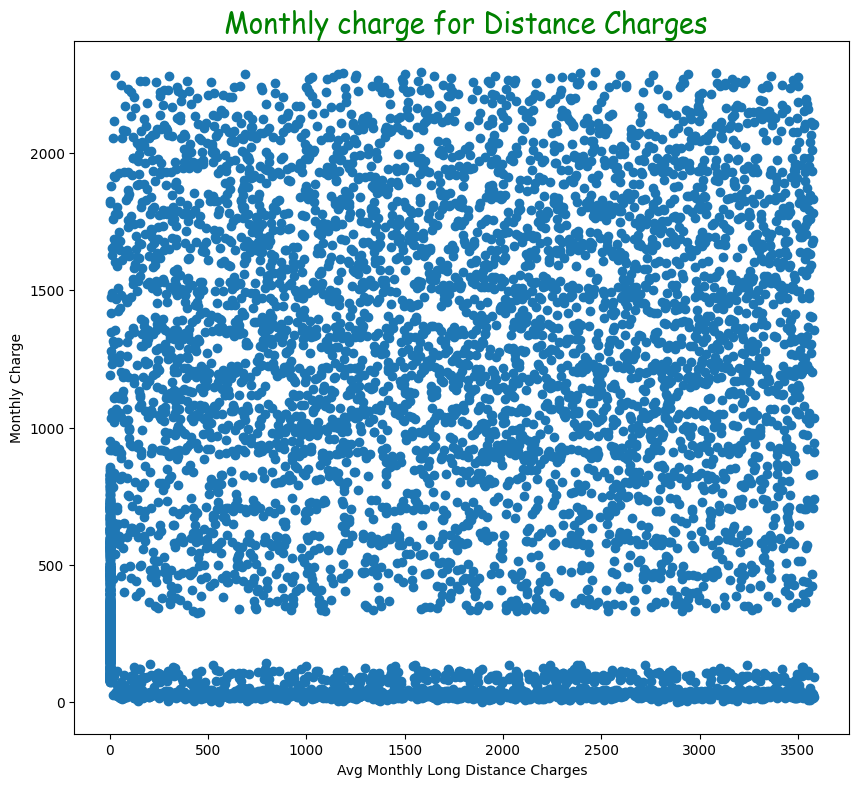

In [83]:
x=df['Avg Monthly Long Distance Charges']
y=df['Monthly Charge']
plt.figure(figsize = (10,9))

plt.xlabel('Avg Monthly Long Distance Charges')
plt.ylabel('Monthly Charge')
plt.title(' Monthly charge for Distance Charges',fontdict={'fontname':'Comic Sans MS','fontsize':20,'color':'g'})
plt.scatter(x,y)
plt.show()

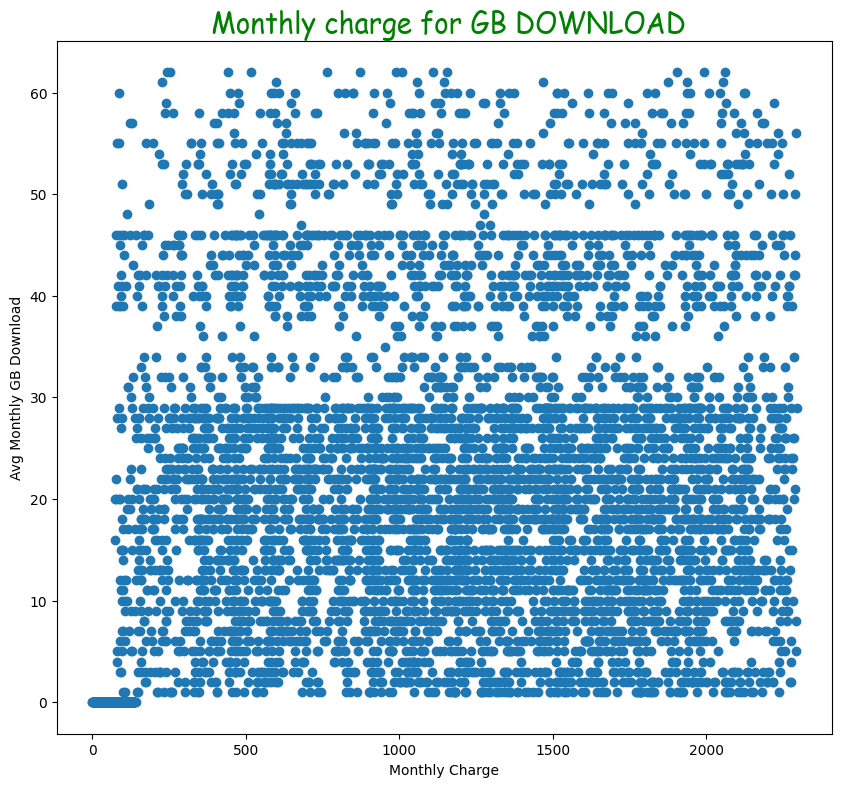

In [84]:
x=df['Monthly Charge']
y=df['Avg Monthly GB Download']
plt.figure(figsize = (10,9))
plt.xlabel('Monthly Charge')

plt.ylabel('Avg Monthly GB Download')
plt.title(' Monthly charge for GB DOWNLOAD',fontdict={'fontname':'Comic Sans MS','fontsize':20,'color':'g'})
plt.scatter(x,y)
plt.show()

In [85]:
grouped_data1 = df2.groupby('Churn Reason').size().reset_index(name='Customers Id')
grouped_data1

Churn Reason  Customers Id
0                Attitude of service provider            94
1                  Attitude of support person           220
2               Competitor had better devices           313
3                Competitor made better offer           311
4   Competitor offered higher download speeds           100
5                Competitor offered more data           117
6                                    Deceased             6
7                                  Don't know           130
8                          Extra data charges            39
9    Lack of affordable download/upload speed            30
10            Lack of self-service on Website            29
11                  Limited range of services            37
12                      Long distance charges            64
13                                      Moved            46
14                        Network reliability            72
15           Poor expertise of online support            31
16            Poor expertise of phone support            12
17                             Price too high            78
18                    Product dissatisfaction            77
19                    Service dissatisfaction            63

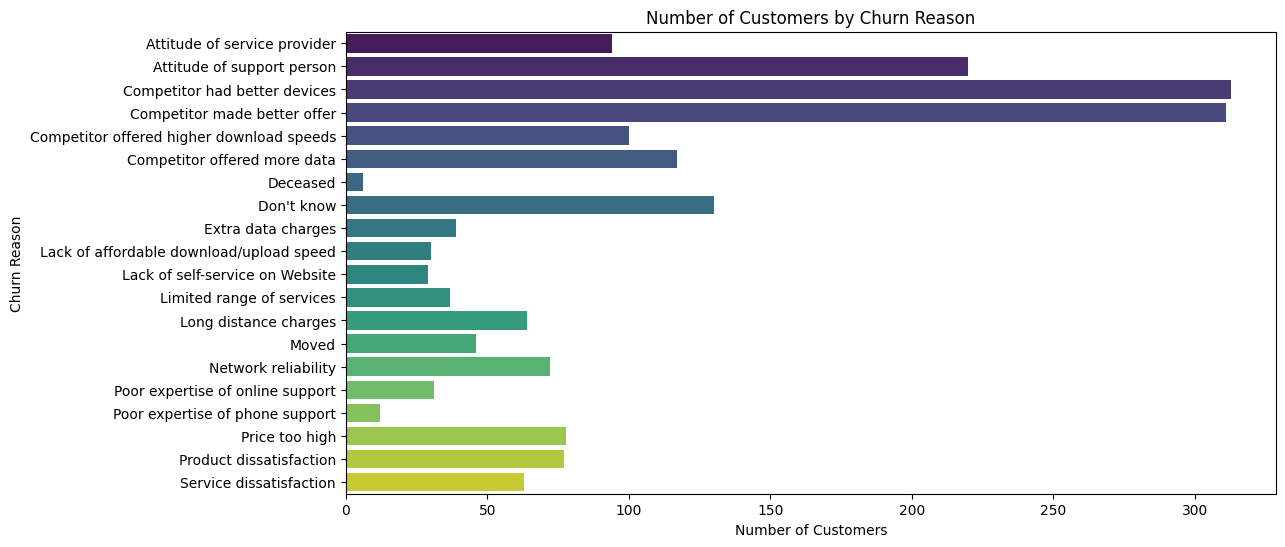

In [86]:

# Assuming 'Churn Reason' is the column in your DataFrame
plt.figure(figsize=(12, 6))
sns.barplot(x='Customers Id', y='Churn Reason', data=grouped_data1, palette='viridis')

plt.title('Number of Customers by Churn Reason')
plt.xlabel('Number of Customers')
plt.ylabel('Churn Reason')
plt.show()


In [87]:
grouped_data3 = df2.groupby('Contract').size().reset_index(name='Customers Id')
grouped_data3

Contract  Customers Id
0  Month-to-Month          3610
1        One Year          1550
2        Two Year          1883

In [88]:
grouped_data3 = df2.groupby('Monthly Charge').size().reset_index(name='Customers Id')
grouped_data3

Monthly Charge  Customers Id
0             18.250             1
1             18.400             1
2             18.550             1
3             18.700             2
4             18.750             1
...              ...           ...
2290         120.276             1
2291         120.848             1
2292         122.148             1
2293         122.512             1
2294         123.084             1

[2295 rows x 2 columns]

In [89]:


grouped_data4 = df2.groupby('Senior Citizen').size().reset_index(name='Customers Id')
grouped_data4

Senior Citizen  Customers Id
0             No          5901
1            Yes          1142

In [90]:
grouped_data5 = df2.groupby('Under 30').size().reset_index(name='Customers Id')
grouped_data5

Under 30  Customers Id
0       No          5642
1      Yes          1401

In [91]:
grouped_data5 = df2.groupby('Internet Type').size().reset_index(name='Customers Id')
grouped_data5

Internet Type  Customers Id
0              0          1546
1              1          1680
2              2          3817

In [92]:
grouped_data6 = df2.groupby('Product/Service Issues Reported').size().reset_index(name='Customers Id')
grouped_data6

Product/Service Issues Reported  Customers Id
0                                0          5621
1                                1           897
2                                2           373
3                                3            97
4                                4            43
5                                5             8
6                                6             4

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


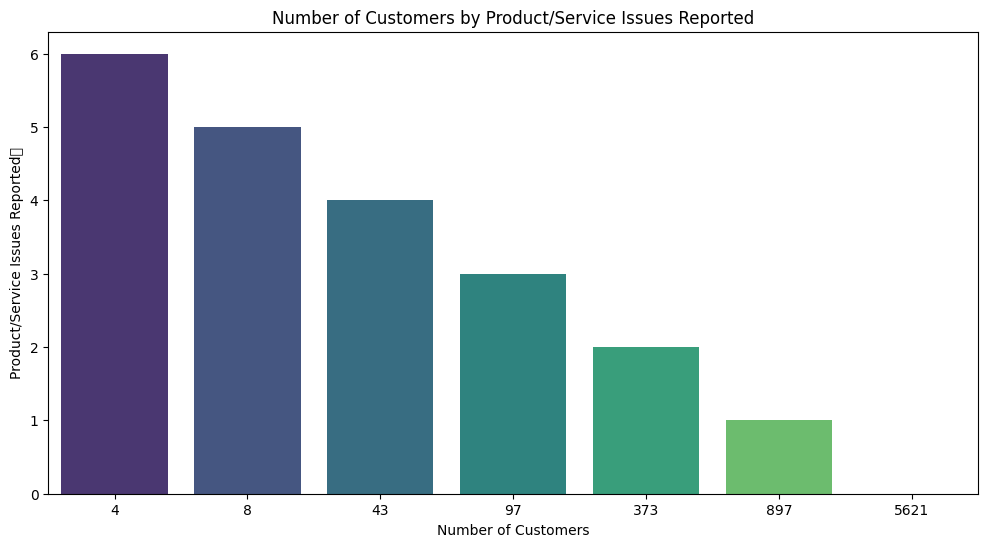

In [93]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Customers Id', y='Product/Service Issues Reported', data=grouped_data6, palette='viridis')

plt.title('Number of Customers by Product/Service Issues Reported')
plt.xlabel('Number of Customers')
plt.ylabel('Product/Service Issues Reported	')
plt.show()

In [94]:
grouped_data7 = df2.groupby('Customer Satisfaction rate').size().reset_index(name='Customers Id')
grouped_data7

Customer Satisfaction rate  Customers Id
0                           0           332
1                           1           200
2                           2          5884
3                           3           380
4                           4           247

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


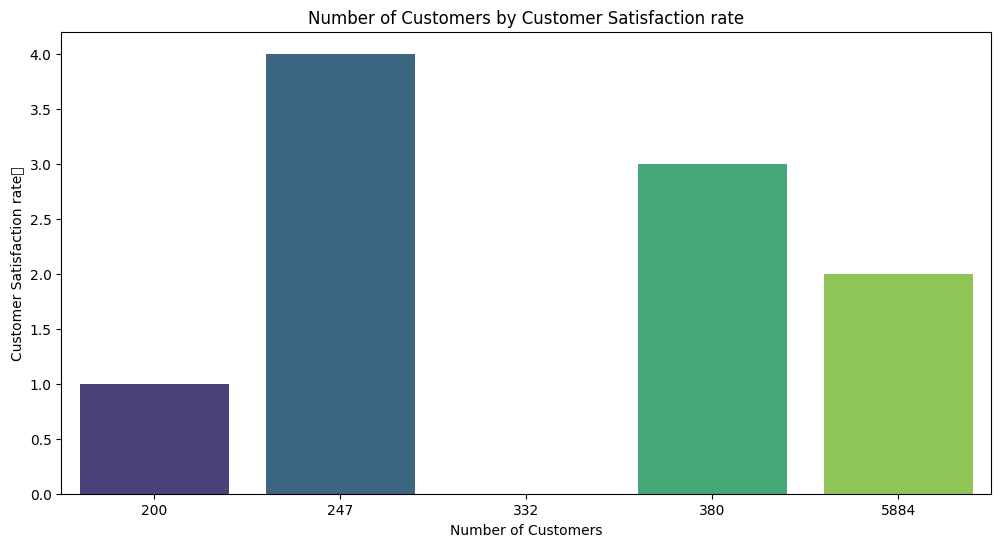

In [95]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Customers Id', y='Customer Satisfaction rate', data=grouped_data7, palette='viridis')

plt.title('Number of Customers by Customer Satisfaction rate')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Satisfaction rate	')
plt.show()

In [96]:
grouped_data9 = df2.groupby('Married').size().reset_index(name='Customers Id')
grouped_data9

Married  Customers Id
0      No          3641
1     Yes          3402

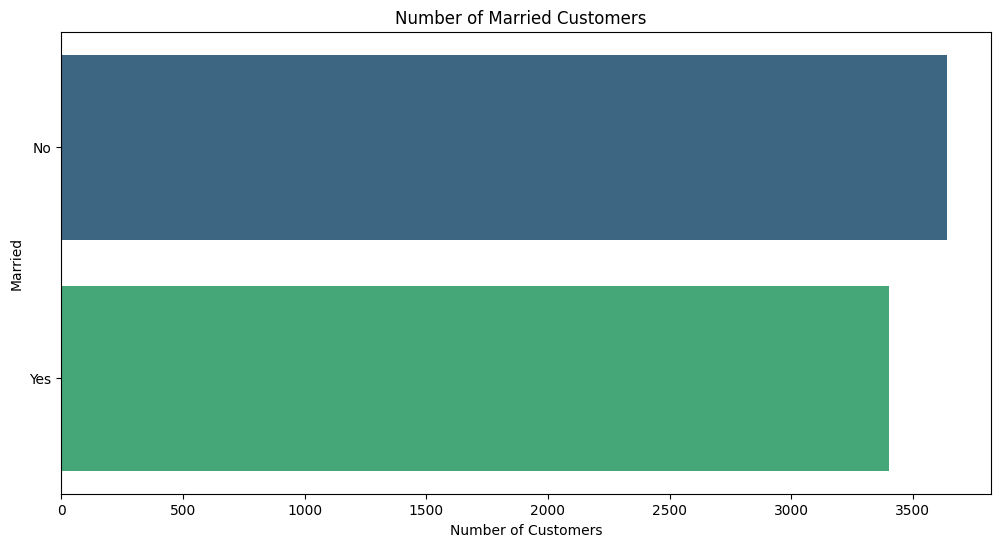

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Customers Id', y='Married', data=grouped_data9, palette='viridis')

plt.title('Number of Married Customers  ')
plt.xlabel('Number of Customers')
plt.ylabel('Married')
plt.show()

In [98]:
grouped_data10 = df2.groupby('Streaming Movies').size().reset_index(name='Customers Id')
grouped_data10

Streaming Movies  Customers Id
0               No          4311
1              Yes          2732

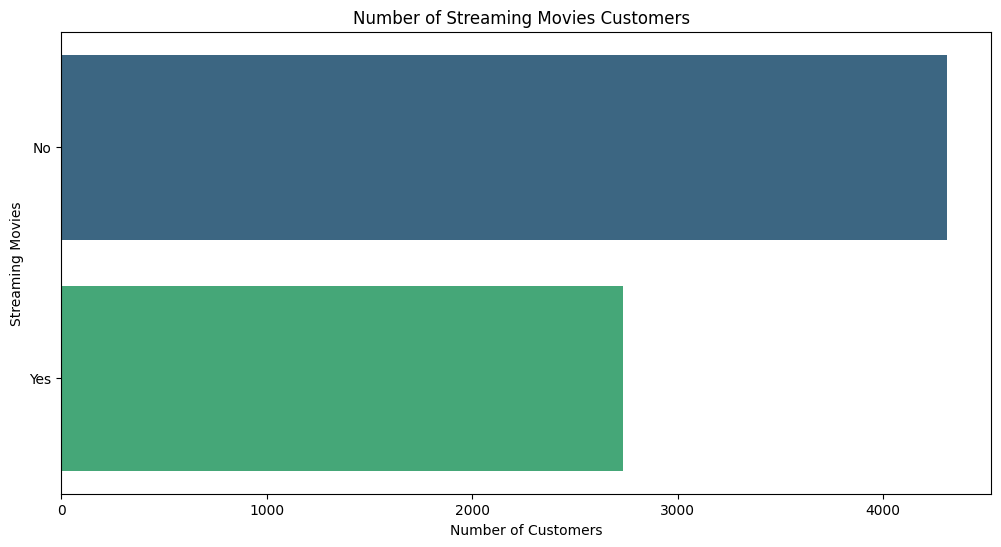

In [99]:


plt.figure(figsize=(12, 6))
sns.barplot(x='Customers Id', y='Streaming Movies', data=grouped_data10, palette='viridis')

plt.title('Number of Streaming Movies Customers  ')
plt.xlabel('Number of Customers')
plt.ylabel('Streaming Movies')
plt.show()

In [100]:

grouped_data11 = df2.groupby('Streaming Music').size().reset_index(name='Customers Id')
grouped_data11

Streaming Music  Customers Id
0              No          4555
1             Yes          2488

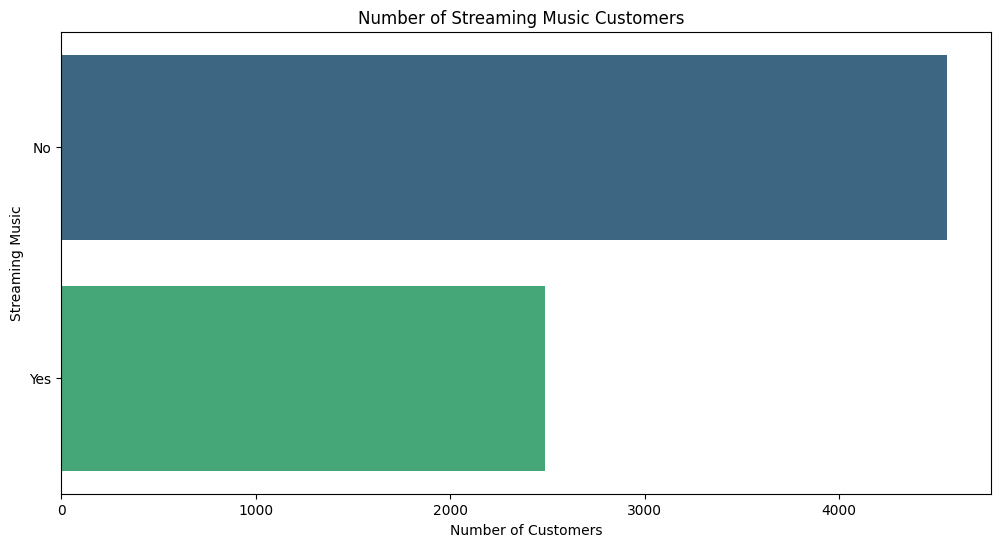

In [101]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Customers Id', y='Streaming Music', data=grouped_data11, palette='viridis')

plt.title('Number of Streaming Music Customers  ')
plt.xlabel('Number of Customers')
plt.ylabel('Streaming Music')
plt.show()

In [102]:


grouped_data12 = df2.groupby('Streaming TV').size().reset_index(name='Customers Id')
grouped_data12

Streaming TV  Customers Id
0           No          4336
1          Yes          2707

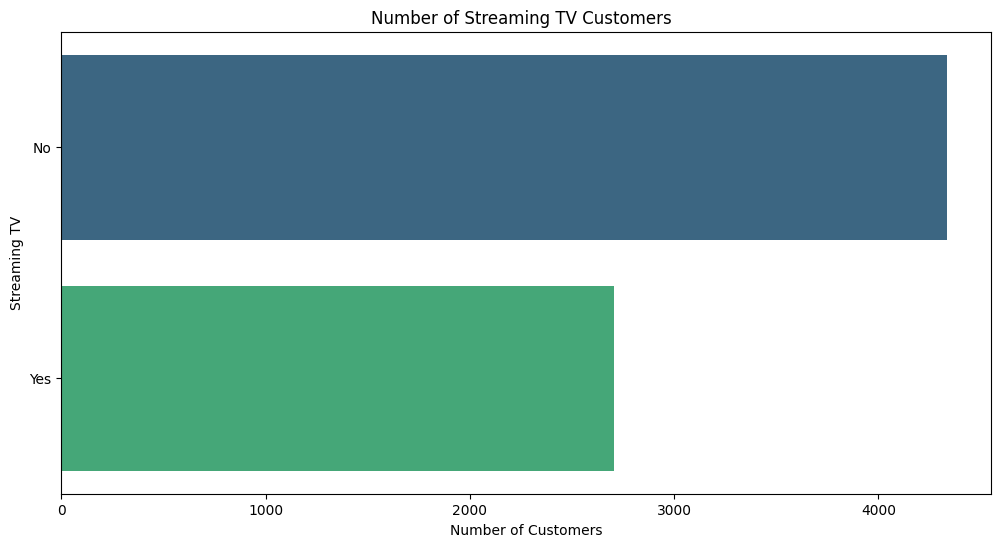

In [103]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Customers Id', y='Streaming TV', data=grouped_data12, palette='viridis')

plt.title('Number of Streaming TV Customers  ')
plt.xlabel('Number of Customers')
plt.ylabel('Streaming TV')
plt.show()

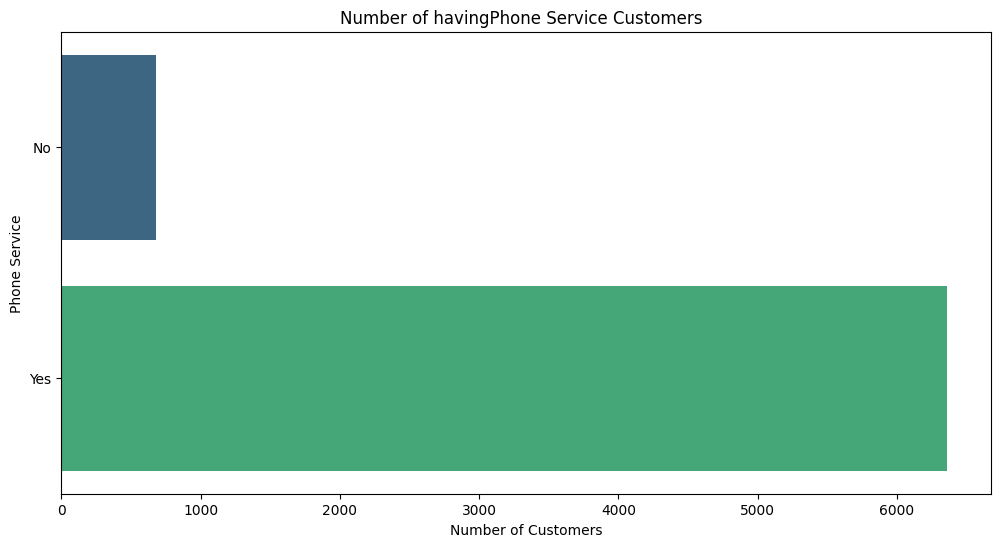

In [104]:
grouped_data13 = df2.groupby('Phone Service').size().reset_index(name='Customers Id')
grouped_data13


plt.figure(figsize=(12, 6))
sns.barplot(x='Customers Id', y='Phone Service', data=grouped_data13, palette='viridis')

plt.title('Number of havingPhone Service Customers  ')
plt.xlabel('Number of Customers')
plt.ylabel('Phone Service')
plt.show()